# <center>Bank Lending Risk Analysis and Metrics</center>


# Data Preparation

## Import Libraries

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()

## Import Data

In [169]:
#ld_backup = pd.read_table(r"C:\Users\DiniDev\Pictures\Imarticus\BankLendingPython\XYZCorp_LendingData.txt", low_memory=False)
#ld_backup.to_csv(r"C:\Users\DiniDev\Pictures\Imarticus\BankLendingPython\ExcelFormat.csv")
loan_data_backup = pd.read_csv(r"C:\Users\DiniDev\Pictures\Imarticus\BankLendingPython\ExcelFormat.csv", low_memory=False)

In [170]:
loan_data = loan_data_backup.copy()

## Explore Data

In [171]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,

In [172]:
pd.options.display.max_columns = None

In [173]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,

In [174]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 74 columns):
Unnamed: 0                     855969 non-null int64
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d               

Text(0.5, 1.0, 'Total committed by Investors')

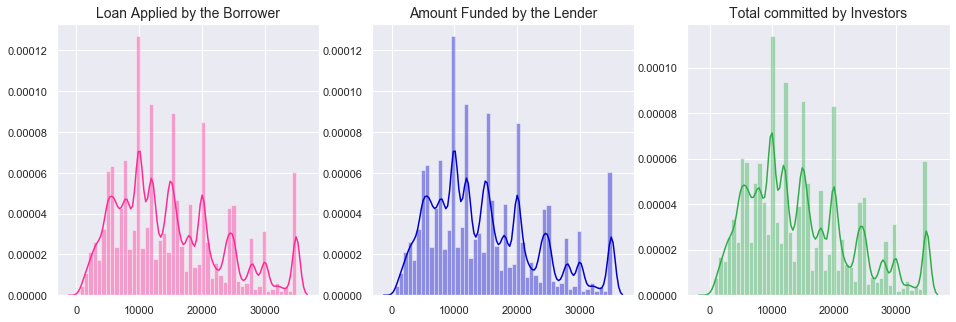

In [175]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = loan_data['loan_amnt'].values
funded_amount = loan_data["funded_amnt"].values
investor_funds = loan_data["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="#ff2994")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#0000cc")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [176]:
# Lets' transform the issue dates by year.
loan_data['issue_d'].head()
dt_series = pd.to_datetime(loan_data['issue_d'])
loan_data['year'] = dt_series.dt.year

Text(0, 0.5, 'Average loan amount issued')

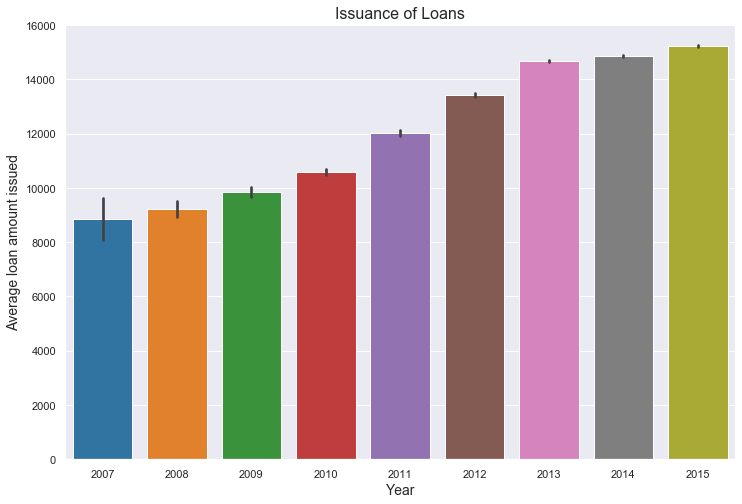

In [177]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=loan_data, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

## General Preprocessing

### Preprocessing few continuous variables

In [178]:
loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [179]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [180]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

str

In [181]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
# Transforms the values to numeric.

In [182]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.float64

In [183]:
loan_data['earliest_cr_line']
# Displays a column.

0         Jan-1985
1         Apr-1999
2         Nov-2001
3         Feb-1996
4         Jan-1996
            ...   
855964    Sep-2004
855965    Mar-1974
855966    Sep-2003
855967    Oct-2003
855968    Dec-2001
Name: earliest_cr_line, Length: 855969, dtype: object

In [184]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%Y')
# Extracts the date and the time from a string variable that is in a given format.

In [185]:
type(loan_data['earliest_cr_line_date'][0])
# Checks the datatype of a single element of a column.

pandas._libs.tslibs.timestamps.Timestamp

In [186]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']
# Calculates the difference between two dates and times.

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
855964    4839 days
855965   15981 days
855966    5205 days
855967    5175 days
855968    5844 days
Name: earliest_cr_line_date, Length: 855969, dtype: timedelta64[ns]

In [187]:
# Assume we are now in December 2017
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

In [188]:
loan_data['mths_since_earliest_cr_line'].describe()
# Shows some descriptive statisics for the values of a column.
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar,
# and negative differences are being calculated.

count    855969.000000
mean        237.125823
std          89.222948
min          61.000000
25%         176.000000
50%         220.000000
75%         282.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [189]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]
# We take three columns from the dataframe. Then, we display them only for the rows where a variable has negative value.
# There are 2303 strange negative values.

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line


In [190]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
# We set the rows that had negative differences to the maximum value.

C:\Users\DiniDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [191]:
min(loan_data['mths_since_earliest_cr_line'])
# Calculates and shows the minimum value of a column.

61.0

In [192]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
855964     36 months
855965     36 months
855966     60 months
855967     60 months
855968     36 months
Name: term, Length: 855969, dtype: object

In [193]:
loan_data['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         855969
unique             2
top        36 months
freq          600221
Name: term, dtype: object

In [194]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).

In [195]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
855964     36
855965     36
855966     60
855967     60
855968     36
Name: term_int, Length: 855969, dtype: object

In [196]:
type(loan_data['term_int'][25])
# Checks the datatype of a single element of a column.

str

In [197]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
855964    36
855965    36
855966    60
855967    60
855968    36
Name: term_int, Length: 855969, dtype: int64

In [198]:
type(loan_data['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

In [199]:
loan_data['issue_d']

0         Dec-2011
1         Dec-2011
2         Dec-2011
3         Dec-2011
4         Dec-2011
            ...   
855964    Jan-2015
855965    Jan-2015
855966    Jan-2015
855967    Jan-2015
855968    Jan-2015
Name: issue_d, Length: 855969, dtype: object

In [200]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%Y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_issue_d'].describe()

count    855969.000000
mean         40.726165
std          15.073435
min          24.000000
25%          29.000000
50%          37.000000
75%          48.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [201]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 81 columns):
Unnamed: 0                     855969 non-null int64
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d               

We are going to preprocess the following discrete variables: grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status. Most likely, we are not going to use sub_grade, as it overlaps with grade.

In [202]:
pd.get_dummies(loan_data['grade'])
# Create dummy variables from a variable.

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
855964,0,1,0,0,0,0,0
855965,0,1,0,0,0,0,0
855966,0,0,0,1,0,0,0
855967,0,0,0,0,1,0,0


In [203]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')
# Create dummy variables from a variable.

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
855964,0,1,0,0,0,0,0
855965,0,1,0,0,0,0,0
855966,0,0,0,1,0,0,0
855967,0,0,0,0,1,0,0


In [204]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['default_ind'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [205]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [206]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [207]:
#concatenating the loan_data + loan_data_dummies
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [208]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
     

### Check for missing values and clean

This is another important preprocessing step 'Dealing with missing values'. To check the missing values we have a dedicated pandas method is NULL which can be applied to our DataFrame.<br>
In order to check null values in Pandas DataFrame, we use isnull() function this function return dataframe of Boolean values which are True for NaN values.

In [209]:
loan_data.isnull()
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe.

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind,year,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:0,loan_status:1,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [210]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.
loan_data.isnull().sum()

Unnamed: 0                                  0
id                                          0
member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                               49443
emp_length                              43061
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
pymnt_plan                                  0
desc                                   734157
purpose                                     0
title                                      33
zip_code                          

In [211]:
pd.options.display.max_rows = 100

In [212]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [213]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [214]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# PD Model: Data Preparation

<h1> Good Loans vs Bad Loans: </h1>
<h2>Types of Loans: </h2>
<a id="types_of_loans"></a>
<br><br>
In this section, we will see what is the amount of bad loans Lending Club has declared so far, of course we have to understand that there are still loans that are at a risk of defaulting in the future. 

<h4> What we need to know: </h4>
<ul>
<li> The amount of bad loans could <b>increment</b> as the days pass by, since we still have a great amount of current loans. </li>
<li> <b>Average annual income</b> is an important key metric for finding possible opportunities of investments in a specific region. </li>

</ul>

<h4> Summary: </h4>
<ul>
<li> Currently, <b>bad loans</b> consist 7.60% of total loans but remember that we still have <b>current loans</b> which have the risk of becoming bad loans. (So this percentage is subjected to possible changes.) </li>
<li> The <b> NorthEast </b> region seems to be the most attractive in term of funding loans to borrowers. </li>
<li> The <b> SouthWest </b> and <b> West</b> regions have experienced a slight increase in the "median income" in the past years. </li> 
<li> <b>Average interest</b> rates have declined since 2012 but this might explain the <b>increase in the volume</b> of loans.  </li>
<li> <b>Employment Length</b> tends to be greater in the regions of the <b>SouthWest</b> and <b>West</b></li>
<li> Clients located in the regions of <b>NorthEast</b> and <b>MidWest</b> have not experienced a drastic increase in debt-to-income(dti) as compared to the other regions. </li>
</ul>

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [215]:
loan_data['default_ind'].unique()

array([0, 1], dtype=int64)

In [216]:
loan_data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [217]:
loan_data['default_ind'].value_counts() / loan_data['default_ind'].count()

0    0.945714
1    0.054286
Name: default_ind, dtype: float64

In [218]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['default_ind'].isin(['0']), 1,0)

In [219]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
855964    1
855965    1
855966    1
855967    1
855968    1
Name: good_bad, Length: 855969, dtype: int32

[Text(0, 0.5, '(%)')]

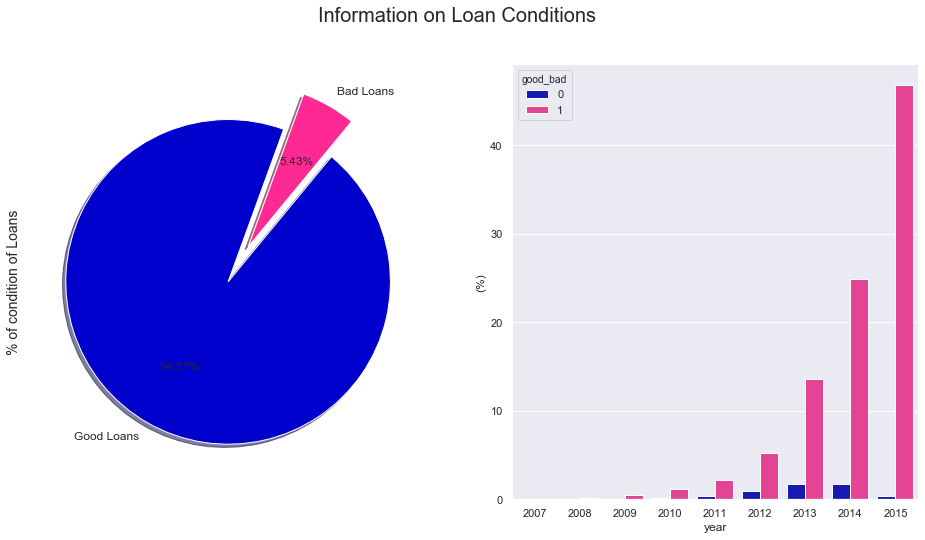

In [220]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#0000cc", "#ff2994"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

loan_data['good_bad'].value_counts().plot.pie(explode=[0,0.25],autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of condition of Loans', fontsize=14)

palette = ["#0000cc", "#ff2994"]

sns.barplot(x="year", y="loan_amnt", hue="good_bad", data=loan_data, palette=palette, estimator=lambda x: len(x) / len(loan_data) * 100)
ax[1].set(ylabel="(%)")

# Data Preparation : Splitting Data
Splitting the Dataset as Train and Test with the help of train_test_split library. So, First we need to import this library from sklearn.model_selection and splitting as loan data input train and test and loan data target train and test.<br>
test_size = 0.2 This line refers the test the dataset for 20% and train 80%.<br>

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 306598      306598   7648721    9330672    10000.0      10000.0   
 561926      561926  61470766   65589535    27525.0      27525.0   
 443075      443075  10578466   12460386     6500.0       6500.0   
 687365      687365  51881720   55311585    15975.0      15975.0   
 799048      799048  41217091   44123834    35000.0      35000.0   
 ...            ...       ...        ...        ...          ...   
 685006      685006  51246056   54665795    12000.0      12000.0   
 297495      297495  27591043   30094139     7800.0       7800.0   
 291950      291950  27552217   30055386    17975.0      17975.0   
 725496      725496  48607329   51856177    20000.0      20000.0   
 834808      834808  39460473   42264250    25000.0      25000.0   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 306598           9900.0   36 months      6.03       304.36     A        A1   
 561926          27525.0

In [223]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [224]:
loan_data_inputs_train.shape

(684775, 201)

In [225]:
loan_data_targets_train.shape

(684775,)

In [226]:
loan_data_inputs_test.shape

(171194, 201)

In [227]:
loan_data_targets_test.shape

(171194,)

### Data Preparation:
Discreate Variable do not need fine classing (splitting into category) because they are already categorical by definition.<br>
Now, Creating a working dataframe for all the preprocessing.

In [228]:
#####
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
#####
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

We want to assess its explanatory power with respect to the outcome of interest that is being a good or a ba borrower. We also need the corrosponding outcomes contained in the good bad column

In [229]:
df_inputs_prepr['grade'].unique()

array(['D', 'B', 'C', 'E', 'F', 'A', 'G'], dtype=object)

The values of the <b>grade</b> variables are letters A to G.<br>
<b>A = Highest credit worthiness<br>
B = Lowest credit worthiness<br></b>
Now, We will calculate the <b>Weight Of Evidence</b> of this discrete variable. The formula was equal to the natural logarith of the ration of the proportion of good borrowers to the proportion of the bad borrowers. Therefore, To find the Weight of Evidence of grade we must first find the proportion of good and bad borrowers by grade.<br>

<img src="https://h2oai.github.io/tutorials/natural-language-processing-tutorial-sentiment-analysis/img/ba961d7376276380.png">

We creating a new dataframe called <b>df1</b> where will store only the independent variables grade from the <b>df_input_prep</b> and the dependent variable good bad from the <b>df_target_prep</b>. 

In [230]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
204061,D,1
831518,B,1
649648,C,1
654074,C,1
463172,B,1


In [231]:
#Finding Count() and finding the proportion of good borrowers using mean() method
count = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
mean = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

In [232]:
#Merging both Count and mean 
df1 = pd.concat([count,mean],axis=1)
df1

,grade,good_bad,grade,good_bad
0,A,29126,A,0.980430
1,B,49637,B,0.962548
2,C,47299,C,0.944375
3,D,26352,D,0.916401
4,E,13467,E,0.901760
5,F,4356,F,0.852388
6,G,957,G,0.818182


In [233]:
#Removing the second grade row and renaming the column names
df1 = df1.iloc[:, [0, 1, 3]]
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,29126,0.980430
1,B,49637,0.962548
2,C,47299,0.944375
3,D,26352,0.916401
4,E,13467,0.901760
5,F,4356,0.852388
6,G,957,0.818182


In [234]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,29126,0.980430,0.170134
1,B,49637,0.962548,0.289946
2,C,47299,0.944375,0.276289
3,D,26352,0.916401,0.153931
4,E,13467,0.901760,0.078665
5,F,4356,0.852388,0.025445
6,G,957,0.818182,0.005590


In [235]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,29126,0.980430,0.170134,28556.0,570.0
1,B,49637,0.962548,0.289946,47778.0,1859.0
2,C,47299,0.944375,0.276289,44668.0,2631.0
3,D,26352,0.916401,0.153931,24149.0,2203.0
4,E,13467,0.901760,0.078665,12144.0,1323.0
5,F,4356,0.852388,0.025445,3713.0,643.0
6,G,957,0.818182,0.005590,783.0,174.0


In [236]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,29126,0.980430,0.170134,28556.0,570.0,0.176499,0.060619
1,B,49637,0.962548,0.289946,47778.0,1859.0,0.295307,0.197703
2,C,47299,0.944375,0.276289,44668.0,2631.0,0.276085,0.279804
3,D,26352,0.916401,0.153931,24149.0,2203.0,0.149260,0.234287
4,E,13467,0.901760,0.078665,12144.0,1323.0,0.075060,0.140700
5,F,4356,0.852388,0.025445,3713.0,643.0,0.022949,0.068382
6,G,957,0.818182,0.005590,783.0,174.0,0.004840,0.018505


In [237]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,957,0.818182,0.005590,783.0,174.0,0.004840,0.018505,-1.341199
1,F,4356,0.852388,0.025445,3713.0,643.0,0.022949,0.068382,-1.091826
2,E,13467,0.901760,0.078665,12144.0,1323.0,0.075060,0.140700,-0.628343
3,D,26352,0.916401,0.153931,24149.0,2203.0,0.149260,0.234287,-0.450854
4,C,47299,0.944375,0.276289,44668.0,2631.0,0.276085,0.279804,-0.013383
5,B,49637,0.962548,0.289946,47778.0,1859.0,0.295307,0.197703,0.401250
6,A,29126,0.980430,0.170134,28556.0,570.0,0.176499,0.060619,1.068709


Now calculating the differences in the proportion of good loans between two subsequent categories and the difference of weight of evidence between two subsequent categories.

In [238]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,957,0.818182,0.005590,783.0,174.0,0.004840,0.018505,-1.341199,NaN,NaN
1,F,4356,0.852388,0.025445,3713.0,643.0,0.022949,0.068382,-1.091826,0.034206,0.249373
2,E,13467,0.901760,0.078665,12144.0,1323.0,0.075060,0.140700,-0.628343,0.049372,0.463483
3,D,26352,0.916401,0.153931,24149.0,2203.0,0.149260,0.234287,-0.450854,0.014641,0.177490
4,C,47299,0.944375,0.276289,44668.0,2631.0,0.276085,0.279804,-0.013383,0.027974,0.437470
5,B,49637,0.962548,0.289946,47778.0,1859.0,0.295307,0.197703,0.401250,0.018173,0.414633
6,A,29126,0.980430,0.170134,28556.0,570.0,0.176499,0.060619,1.068709,0.017882,0.667459


# Information Values and Weight of Evidence Formula:
<img src="https://www.janbasktraining.com/community/uploads/dc89435e9ce59d5045923e0089a2cec6.png"></src>

In [239]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,957,0.818182,0.005590,783.0,174.0,0.004840,0.018505,-1.341199,NaN,NaN,0.310567
1,F,4356,0.852388,0.025445,3713.0,643.0,0.022949,0.068382,-1.091826,0.034206,0.249373,0.310567
2,E,13467,0.901760,0.078665,12144.0,1323.0,0.075060,0.140700,-0.628343,0.049372,0.463483,0.310567
3,D,26352,0.916401,0.153931,24149.0,2203.0,0.149260,0.234287,-0.450854,0.014641,0.177490,0.310567
4,C,47299,0.944375,0.276289,44668.0,2631.0,0.276085,0.279804,-0.013383,0.027974,0.437470,0.310567
5,B,49637,0.962548,0.289946,47778.0,1859.0,0.295307,0.197703,0.401250,0.018173,0.414633,0.310567
6,A,29126,0.980430,0.170134,28556.0,570.0,0.176499,0.060619,1.068709,0.017882,0.667459,0.310567


## The Importance of Credit Scores:
<a id="credit_scores"></a>
Credit scores are important metrics for assessing the overall level of risk. In this section we will analyze the level of risk as a whole and how many loans were bad loans by the type of grade received in the credit score of the customer.

<h4> What we need to know: </h4>
<ul> 
<li> The lower the grade of the credit score, the higher the risk for investors. </li>
<li> There are different factors that influence on the level of risk of the loan.</li>
</ul>

<h4> Summary: </h4>
<ul>
<li> The scores that has a lower grade received a larger amounts of loans (which might had contributed to a higher level of risk). </li>
<li> Logically, the <b>lower the grade the higher the interest</b> the customer had to pay back to investors.</li>
<li> Interestingly, customers with a <b>grade</b> of "C" were more likely to default on the loan </li>
<ul>

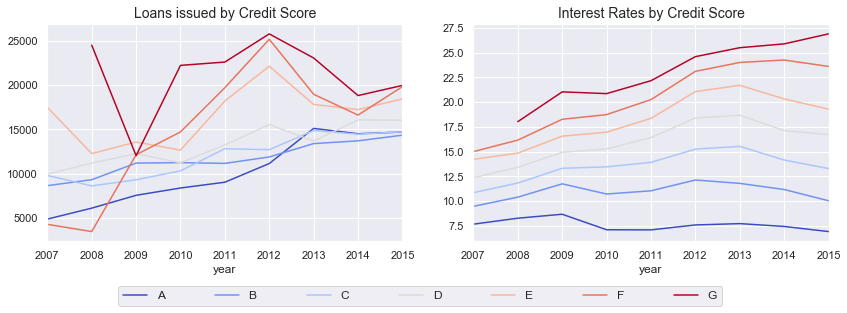

In [240]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df_inputs_prepr.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df_inputs_prepr.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

In [242]:
# Determining the loans that are bad from loan_status column

bad_loan = [1]


df_inputs_prepr['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df_inputs_prepr['loan_condition'] = df_inputs_prepr['default_ind'].apply(loan_condition)

Text(0, 0.5, 'Interest Rate (%)')

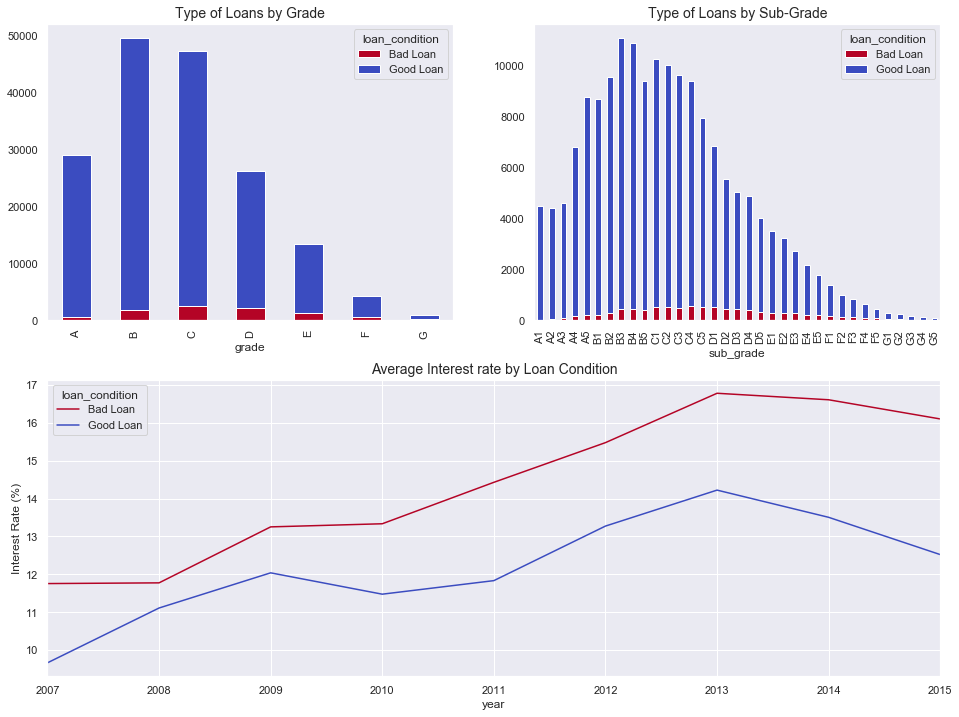

In [243]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df_inputs_prepr.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = df_inputs_prepr.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = df_inputs_prepr.groupby(['year', 'loan_condition']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

### Preprocessing Discrete Variables: Automating Calculaions

We Calculated the <b>Weight of Evidence (WOE) and Information Value(IV)</b> for the <b>grade</b> variable.
Now we have to make same the same calculations for atleast 5 more categorical variables. 
We going to write a code for automatic calculation for categorical variable and dependent variable. 

In [244]:
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [245]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,957,0.818182,0.005590,783.0,174.0,0.004840,0.018505,-1.341199,NaN,NaN,0.310567
1,F,4356,0.852388,0.025445,3713.0,643.0,0.022949,0.068382,-1.091826,0.034206,0.249373,0.310567
2,E,13467,0.901760,0.078665,12144.0,1323.0,0.075060,0.140700,-0.628343,0.049372,0.463483,0.310567
3,D,26352,0.916401,0.153931,24149.0,2203.0,0.149260,0.234287,-0.450854,0.014641,0.177490,0.310567
4,C,47299,0.944375,0.276289,44668.0,2631.0,0.276085,0.279804,-0.013383,0.027974,0.437470,0.310567
5,B,49637,0.962548,0.289946,47778.0,1859.0,0.295307,0.197703,0.401250,0.018173,0.414633,0.310567
6,A,29126,0.980430,0.170134,28556.0,570.0,0.176499,0.060619,1.068709,0.017882,0.667459,0.310567


### Preprocessing Discrete Variables: Visualizing Results

In [246]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

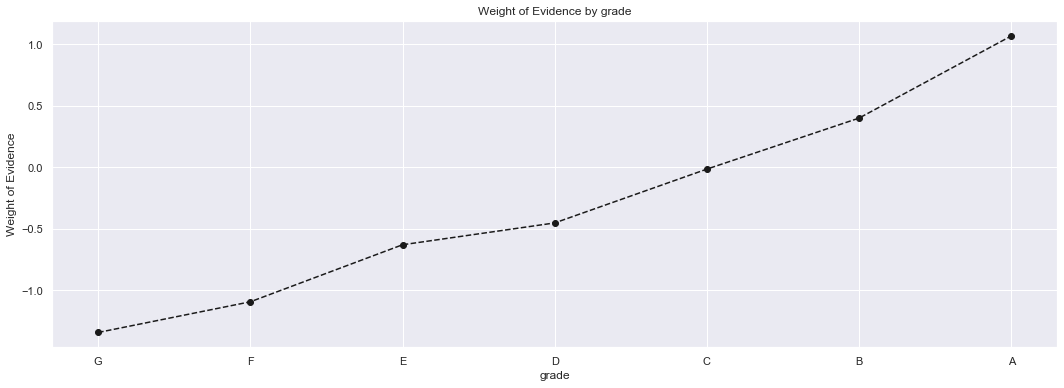

In [247]:
plot_by_woe(df_temp)

### <hr>Preprocessing Discrete Variables : Creating Dummy Variables
#### Dummy variable for home_ownership

In [248]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,20,0.800000,0.000117,16.0,4.0,0.000099,0.000425,-1.458982,NaN,NaN,inf
1,NONE,10,0.900000,0.000058,9.0,1.0,0.000056,0.000106,-0.648052,0.100000,0.810930,inf
2,RENT,68488,0.936733,0.400061,64155.0,4333.0,0.396530,0.460810,-0.150235,0.036733,0.497817,inf
3,OWN,16854,0.947431,0.098450,15968.0,886.0,0.098695,0.094225,0.046348,0.010697,0.196583,inf
4,MORTGAGE,85821,0.951306,0.501308,81642.0,4179.0,0.504614,0.444433,0.126995,0.003875,0.080647,inf
5,ANY,1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.048694,inf,inf


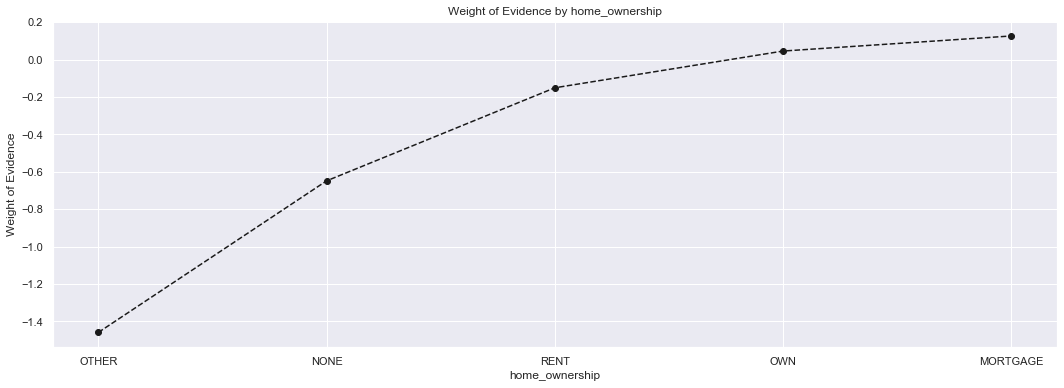

In [249]:
plot_by_woe(df_temp)

In [250]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

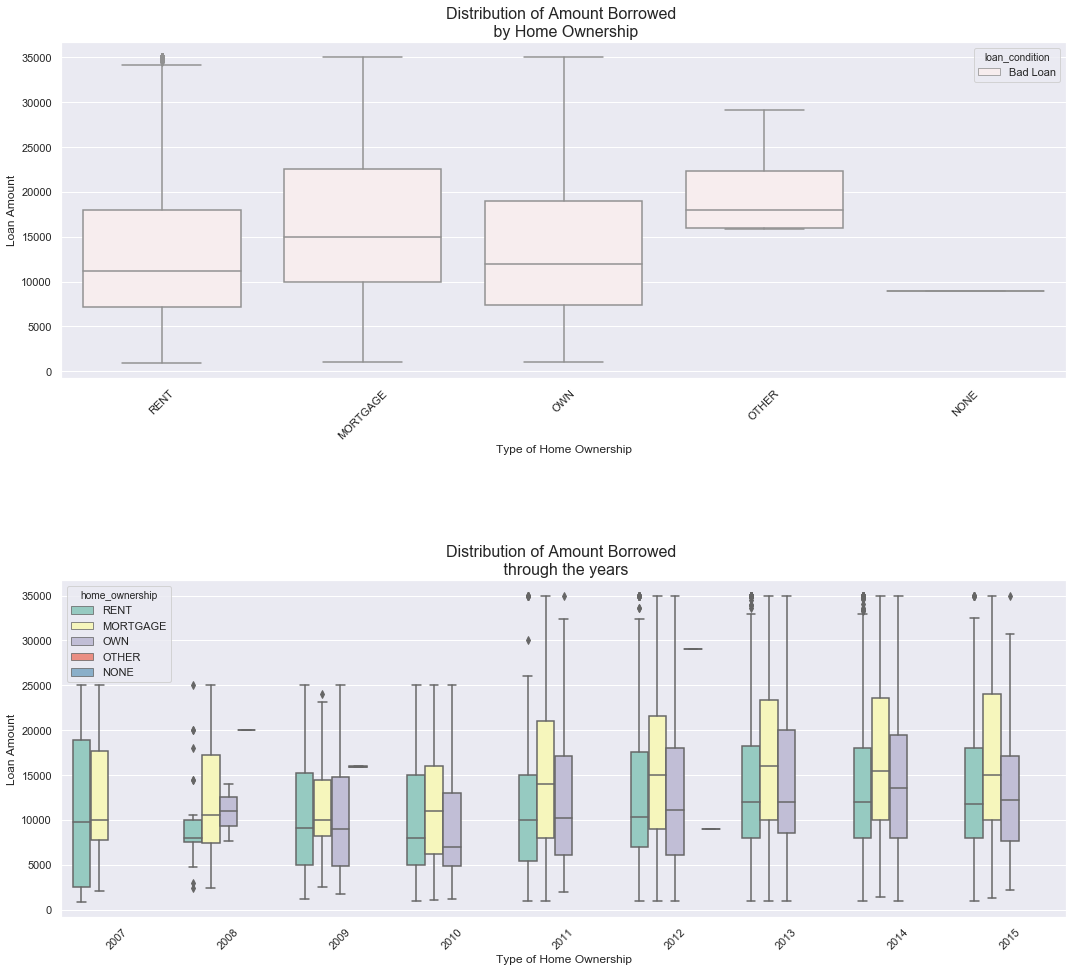

In [251]:
import seaborn as sns

plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = df_inputs_prepr.loc[df_inputs_prepr['loan_condition'] == 'Bad Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_condition',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amnt', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

#### <hr>Dummy variable for addr_state

In [252]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'TN', 'AZ', 'MD', 'GA', 'OH', 'CO', 'ME', 'FL', 'LA', 'NC',
       'MN', 'NY', 'IL', 'TX', 'PA', 'IN', 'NJ', 'MA', 'MO', 'MI', 'OR',
       'CT', 'SC', 'MS', 'WI', 'WA', 'KY', 'VA', 'WV', 'VT', 'AR', 'DE',
       'NV', 'SD', 'KS', 'AL', 'WY', 'UT', 'NM', 'ND', 'AK', 'MT', 'RI',
       'NH', 'OK', 'HI', 'DC', 'NE', 'IA'], dtype=object)

In [253]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\DiniDev\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning:

invalid value encountered in subtract



,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,3,0.666667,0.000018,2.0,1.0,0.000012,0.000106,-2.152129,NaN,NaN,inf
1,NV,2410,0.929876,0.014078,2241.0,169.0,0.013851,0.017973,-0.260498,0.263209,1.891632,inf
2,UT,1200,0.931667,0.007010,1118.0,82.0,0.006910,0.008721,-0.232699,0.001791,0.027799,inf
3,HI,847,0.932704,0.004948,790.0,57.0,0.004883,0.006062,-0.216295,0.001037,0.016404,inf
4,NY,14255,0.936864,0.083268,13355.0,900.0,0.082545,0.095714,-0.148025,0.004161,0.068270,inf
5,NC,4762,0.938261,0.027816,4468.0,294.0,0.027616,0.031267,-0.124160,0.001397,0.023865,inf
6,VA,5006,0.939073,0.029242,4701.0,305.0,0.029056,0.032436,-0.110058,0.000812,0.014102,inf
7,MO,2724,0.939794,0.015912,2560.0,164.0,0.015823,0.017441,-0.097380,0.000721,0.012677,inf
8,MD,4096,0.940430,0.023926,3852.0,244.0,0.023808,0.025949,-0.086097,0.000635,0.011283,inf
9,CA,24989,0.940934,0.145969,23513.0,1476.0,0.145329,0.156971,-0.077059,0.000504,0.009038,inf


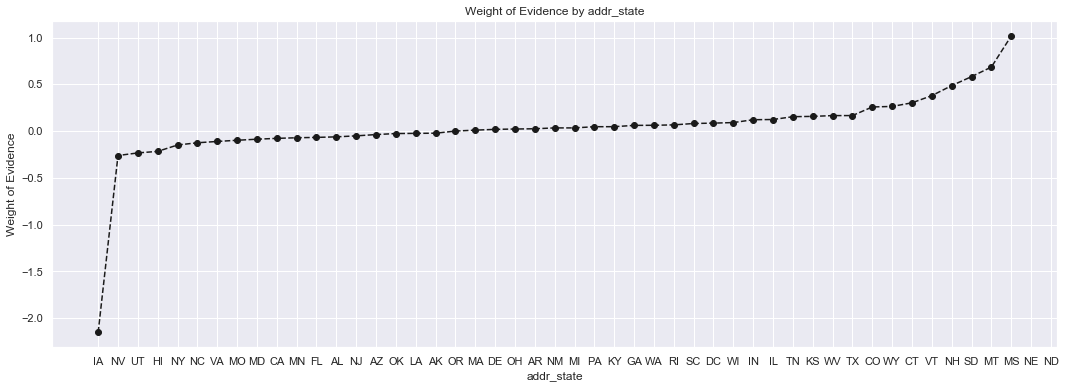

In [254]:
plot_by_woe(df_temp)

In [255]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

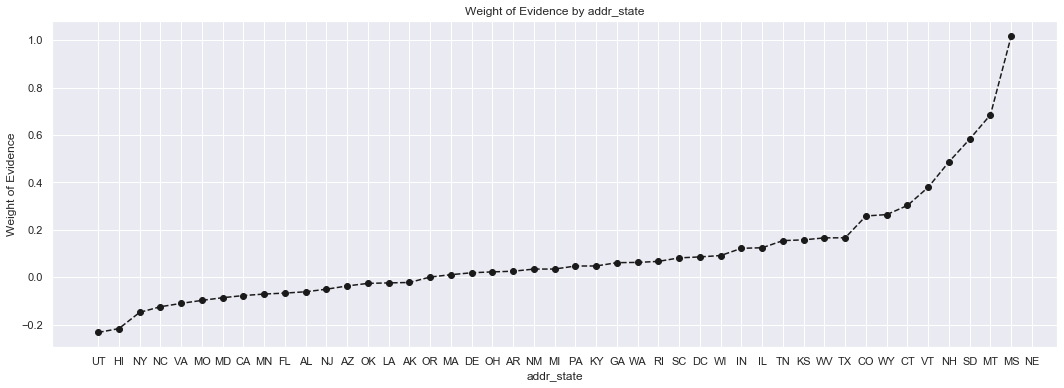

In [256]:
plot_by_woe(df_temp.iloc[2: -2, : ])

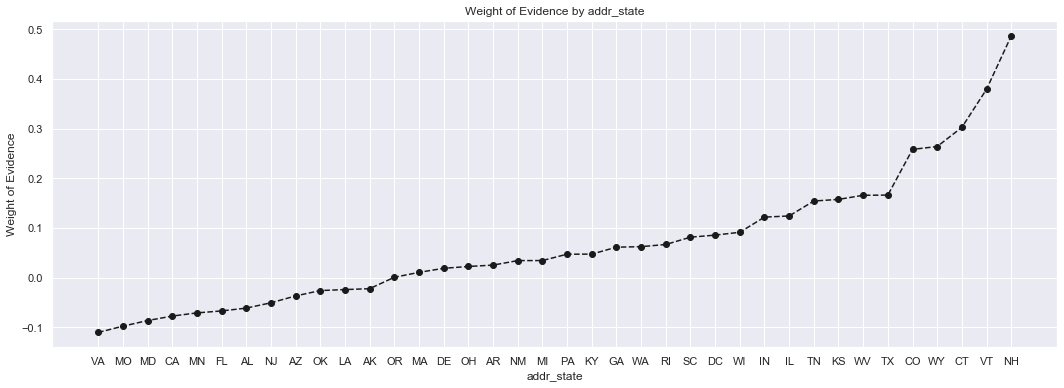

In [257]:
plot_by_woe(df_temp.iloc[6: -6, : ])

In [258]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

<h1 align="center"> The Business Perspective </h1>
<h2 > Understanding the Operative Side of Business </h2>

Now we will have a closer look at the <b> operative side </b> of business by state. This will give us a clearer idea in which state we have a higher operating activity. This will allow us to ask further questions such as Why do we have a higher level of operating activity in this state? Could it be because of economic factors? or the risk level is low and returns are fairly decent? Let's explore!

<h4> What we need to know: </h4>
<ul>
<li> We will focus on <b>three key metrics</b>: Loans issued by state (Total Sum), Average interest rates charged to customers and average annual income of all customers by state. </li>
<li> The purpose of this analysis is to see states that give high returns at a descent risk. </li>

</ul>

<h4> Summary: </h4>
<ul>
<li> <b>California, Texas, New York and Florida</b> are the states in which the highest amount of loans were issued. </li>
<li> Interesting enough, all four states have a approximate <b>interest rate of 13%</b> which is at the same level of the average interest rate for all states (13.24%) </li>
<li> California, Texas and New York are <b>all above the average annual income</b> (with the exclusion of Florida), this might give possible indication why most loans are issued in these states. </li>
</ul>

In [259]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df_inputs_prepr.groupby(['addr_state'], as_index=False).loan_amnt.sum()
by_interest_rate = df_inputs_prepr.groupby([ 'addr_state'], as_index=False).int_rate.mean()
by_income = df_inputs_prepr.groupby([ 'addr_state'], as_index=False).annual_inc.mean()

# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()

from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     
metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()

# Think of a way to add default rate
# Consider adding a few more metrics for the future

,state_codes,issued_loans,interest_rate,annual_income
0,AK,7298125.0,13.35,77738.14
1,AL,32172475.0,13.65,68652.22
2,AR,18071175.0,13.42,67039.88
3,AZ,55756475.0,13.09,71086.48
4,CA,366217025.0,13.10,79434.85


In [260]:
# Now it comes the part where we plot out plotly United States map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

## Analysis by Income Category:
<a id="income_category"></a>
In this section we will create different <b> income categories </b> in order to detect important patters and go more into depth in our analysis.

**What we need to know:** <br>
<ul>
<li><b>Low income category:</b> Borrowers that have an annual income lower or equal to 100,000 usd.</li>
<li> <b> Medium income category:</b> Borrowers that have an annual income higher than 100,000 usd but lower or equal to 200,000 usd. </li>
<li><b> High income category: </b> Borrowers that have an annual income higher tha 200,000 usd. </li>
</ul>

**Summary:**
<ul>
<li>Borrowers that made part of the <b>high income category</b> took higher loan amounts than people from <b>low</b> and <b>medium income categories.</b> Of course, people with higher annual incomes are more likely to pay loans with a higher amount. (First row to the left of the subplots) </li>
<li> Loans that were borrowed by the <b>Low income category</b> had a slightly higher change of becoming a bad loan. (First row to the right of the subplots) </li>
<li>Borrowers with <b>High</b> and <b> Medium</b> annual incomes had a longer employment length than people with lower incomes.(Second row to the left of the subplots) </li>
<li> Borrowers with a lower income had on average <b>higher interest rates</b> while people with a higher annual income had <b>lower interest rates</b> on their loans. (Second row to the right of the subplots)</li> 

</ul>

In [261]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df_inputs_prepr['income_category'] = np.nan
lst = [df_inputs_prepr]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'

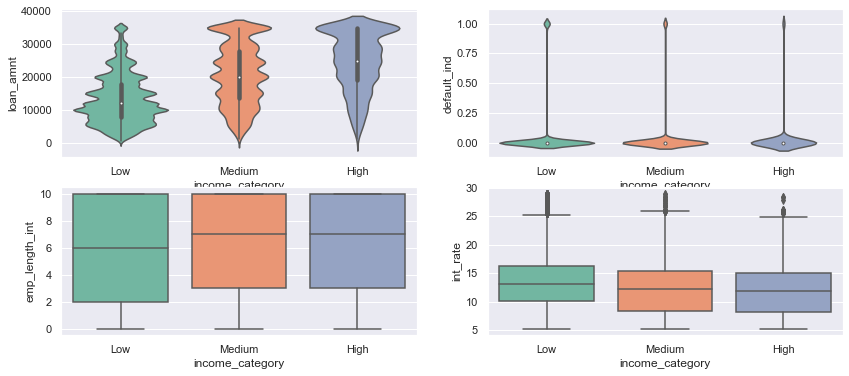

In [262]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amnt", data=df_inputs_prepr, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="default_ind", data=df_inputs_prepr, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=df_inputs_prepr, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=df_inputs_prepr, palette="Set2", ax=ax4)

<h1 align="center"> Assesing Risks </h1>
<h2> Understanding the Risky side of Business </h2>
<a id="risky_side"></a>

Although the <b> operative side of business </b> is important, we have to also analyze the level of risk in each state. Credit scores are important metrics to analyze the level of risk of an individual customer. However, there are also other important metrics to somehow estimate the level of risk of other states. <br><br>

<h4> What we need to know: </h4>
<ul>
<li> <b>Debt-to-income</b> is an important metric since it says approximately the level of debt of each individual consumer with respect to its total income. </li>
<li> The <b>average length of employment</b> tells us a better story about the labor market in each state which is helpful to assess the levelof risk. </li>
</ul>

<h4> Summary: </h4>
<ul>
<li> <b>IOWA</b> has the highest level of default ratio neverthless, the amount of loans issued in that state is <b>too low</b>. (Number of Bad loans is equal to 3) </li>
<li> California and Texas seem to have the lowest risk and the highest possible return for investors. However, I will look more deeply into these states and create other metrics analyze the level of risk for each state. </li>

</ul>

In [263]:
by_condition = df_inputs_prepr.groupby('addr_state')['loan_condition'].value_counts()/ df_inputs_prepr.groupby('addr_state')['loan_condition'].count()
by_emp_length = df_inputs_prepr.groupby([ 'addr_state'], as_index=False).emp_length_int.mean().sort_values(by="addr_state")

loan_condition_bystate = pd.crosstab(df_inputs_prepr['addr_state'], df_inputs_prepr['loan_condition'] )

cross_condition = pd.crosstab(df_inputs_prepr["addr_state"], df_inputs_prepr["loan_condition"])
# Percentage of condition of loan
percentage_loan_contributor = pd.crosstab(df_inputs_prepr['addr_state'], df_inputs_prepr['loan_condition']).apply(lambda x: x/x.sum() * 100)
condition_ratio = cross_condition["Bad Loan"]/cross_condition["Good Loan"]
by_dti = df_inputs_prepr.groupby(['addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)


# Take to a list
default_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
average_emp_length = by_emp_length["emp_length_int"].values.tolist()
number_of_badloans = loan_condition_bystate['Bad Loan'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor['Bad Loan'].values.tolist()


# Figure Number 2
risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('percentage_of_badloans', percentage_ofall_badloans),
                         ('average_dti', average_dti),
                         ('average_emp_length', average_emp_length)])


# Figure 2 Dataframe 
risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
risk_df.head()

,state_codes,default_ratio,badloans_amount,percentage_of_badloans,average_dti,average_emp_length
0,AK,0.059,24,0.255,18.328,5.935
1,AL,0.062,128,1.361,20.188,6.240
2,AR,0.057,69,0.734,20.266,5.942
3,AZ,0.060,224,2.382,17.830,5.343
4,CA,0.063,1476,15.697,16.682,5.677


In [264]:
# Now it comes the part where we plot out plotly United States map
import plotly.graph_objs as go


for col in risk_df.columns:
    risk_df[col] = risk_df[col].astype(str)
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],\
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(232, 70, 54)'],[1.0, 'rgb(212, 31, 13)']]

risk_df['text'] = risk_df['state_codes'] + '<br>' +\
'Number of Bad Loans: ' + risk_df['badloans_amount'] + '<br>' + \
'Percentage of all Bad Loans: ' + risk_df['percentage_of_badloans'] + '%' +  '<br>' + \
'Average Debt-to-Income Ratio: ' + risk_df['average_dti'] + '<br>'+\
'Average Length of Employment: ' + risk_df['average_emp_length'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = risk_df['state_codes'],
        z = risk_df['default_ratio'], 
        locationmode = 'USA-states',
        text = risk_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Lending Clubs Default Rates <br> (Analyzing Risks)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

#### <hr>Dummy variable for verification_status

In [265]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,55800,0.928082,0.325946,51787.0,4013.0,0.320086,0.426779,-0.287677,NaN,NaN,0.049737
1,Not Verified,51569,0.951482,0.301231,49067.0,2502.0,0.303274,0.266085,0.130820,0.023400,0.418496,0.049737
2,Source Verified,63825,0.954751,0.372823,60937.0,2888.0,0.376640,0.307136,0.204000,0.003269,0.073180,0.049737


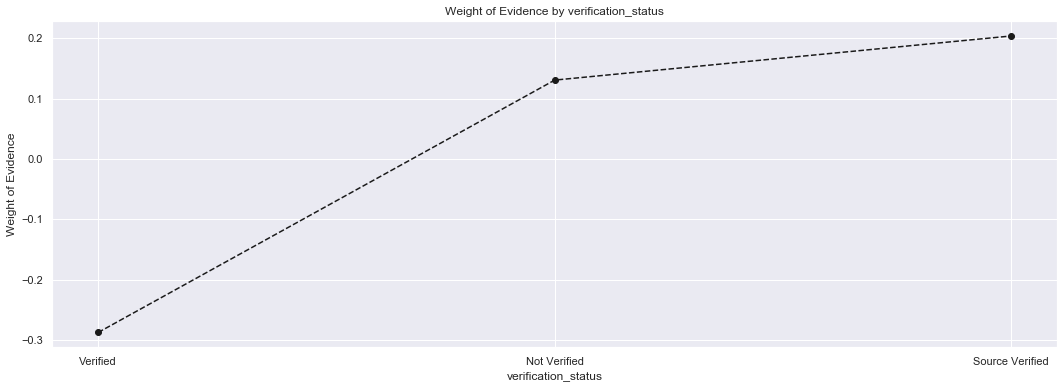

In [266]:
plot_by_woe(df_temp)

#### <hr>Dummy variable for purpose

In [267]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,63,0.809524,0.000368,51.0,12.0,0.000315,0.001276,-1.398358,NaN,NaN,0.057557
1,small_business,1919,0.852527,0.011210,1636.0,283.0,0.010112,0.030097,-1.090714,0.043004,0.307644,0.057557
2,renewable_energy,116,0.896552,0.000678,104.0,12.0,0.000643,0.001276,-0.685792,0.044024,0.404922,0.057557
3,wedding,452,0.904867,0.002640,409.0,43.0,0.002528,0.004573,-0.592762,0.008316,0.093031,0.057557
4,moving,1003,0.919242,0.005859,922.0,81.0,0.005699,0.008614,-0.413181,0.014375,0.179581,0.057557
5,other,8300,0.922048,0.048483,7653.0,647.0,0.047302,0.068808,-0.374770,0.002806,0.038411,0.057557
6,medical,1618,0.930161,0.009451,1505.0,113.0,0.009302,0.012017,-0.256116,0.008112,0.118654,0.057557
7,house,724,0.930939,0.004229,674.0,50.0,0.004166,0.005317,-0.244069,0.000779,0.012047,0.057557
8,car,1717,0.941176,0.010030,1616.0,101.0,0.009988,0.010741,-0.072688,0.010237,0.171382,0.057557
9,debt_consolidation,101339,0.943418,0.591954,95605.0,5734.0,0.590917,0.609805,-0.031465,0.002241,0.041223,0.057557


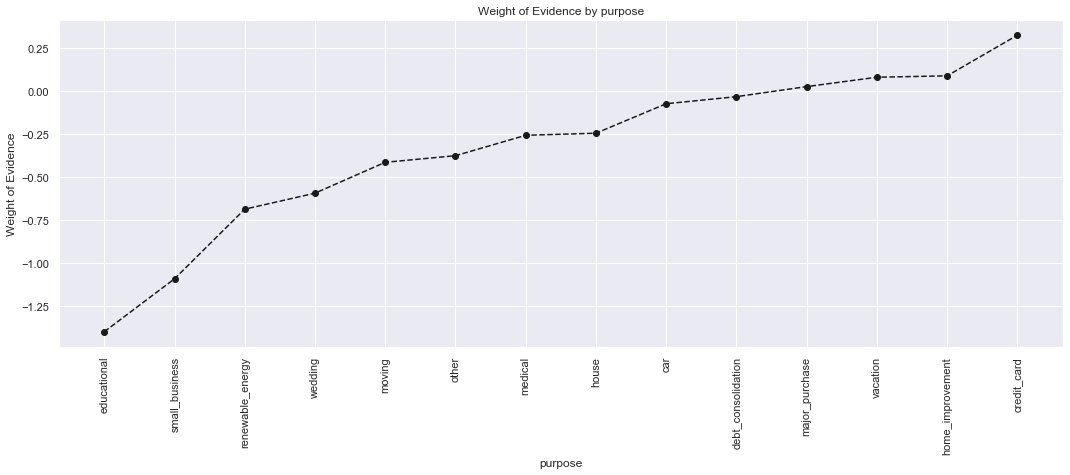

In [268]:
plot_by_woe(df_temp, 90)

In [269]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

## Condition of Loans and Purpose:
<a id="loan_condition"></a>
In this section we will go into depth regarding the <b>reasons for clients to apply for a loan. </b> Our main aim is to see if there are purposes that contribute to a <b> "higher" </b> risk whether the loan will be repaid or not.

### Summary: 
<ul>
<li> <b>Bad Loans Count: </b> People that apply for educational and small business purposed tend to have a higher risk of being a bad loan. (% wise) </li>
<li><b>Most frequent Purpose: </b> The reason that clients applied the most for a loan was to consolidate debt. </li>
<li><b>Less frequent purpose:</b> Clients applied less for educational purposes for all three income categories.  </li>
<li><b>Interest Rates: </b> In all reasons for application except (medical, small business and credi card), the low income category has a higher interest rate. Something that could possibly explain this is the amount of capital that is needed from other income categories that might explain why the low income categories interest rate for these puposes are lower.  </li>
<li><b>Bad/Good Ratio:</b> Except for educational purposes (we see a spike in high income this is due to the reasons that only two loans were issued and one was a bad loan which caused this ratio to spike to 50%.), but we can see that in all other purposed the bad good ratio is lower the higher your income category.  </li>

</ul>

In [270]:
df_inputs_prepr['purpose'].value_counts()

# Education, renewable energy, wedding are the purposed that contains highest bad loans percent wise.

purpose_condition = round(pd.crosstab(df_inputs_prepr['loan_condition'], df_inputs_prepr['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns


bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2
        )
    )
)

good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line = dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2
        )
    )
)


data = [bad_plot, good_plot]

layout = go.Layout(
    title='Condition of Loan by Purpose',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='% of the Loan',
    ),
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='condition_purposes')

#### <hr>Dummy variable for initial_list_status

In [271]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,88616,0.922599,0.517635,81757.0,6859.0,0.505325,0.729448,-0.367087,NaN,NaN,0.217517
1,w,82578,0.969193,0.482365,80034.0,2544.0,0.494675,0.270552,0.603437,0.046594,0.970524,0.217517


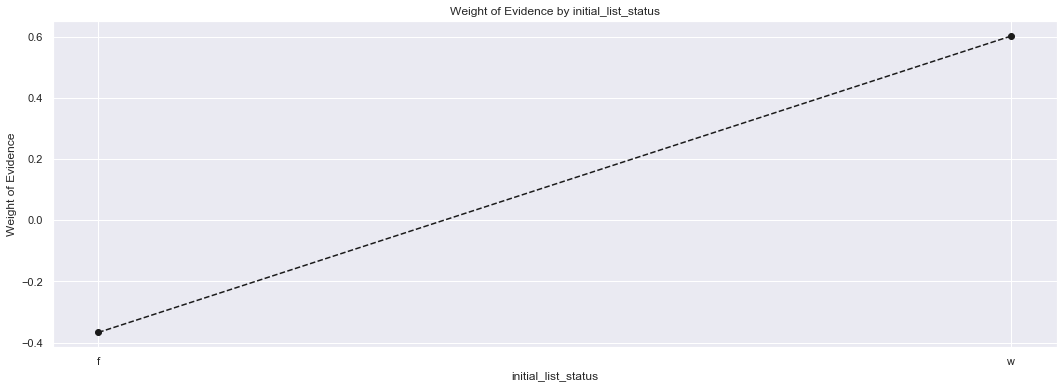

In [272]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [273]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### <hr>Dummy Variables for term_new

In [274]:
df_inputs_prepr['term_int'].unique()

array([36, 60], dtype=int64)

In [275]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,120029,0.950362,0.701129,114071.0,5958.0,0.705052,0.633628,0.10681,NaN,NaN,0.023117
1,60,51165,0.932669,0.298871,47720.0,3445.0,0.294948,0.366372,-0.21685,0.017693,0.32366,0.023117


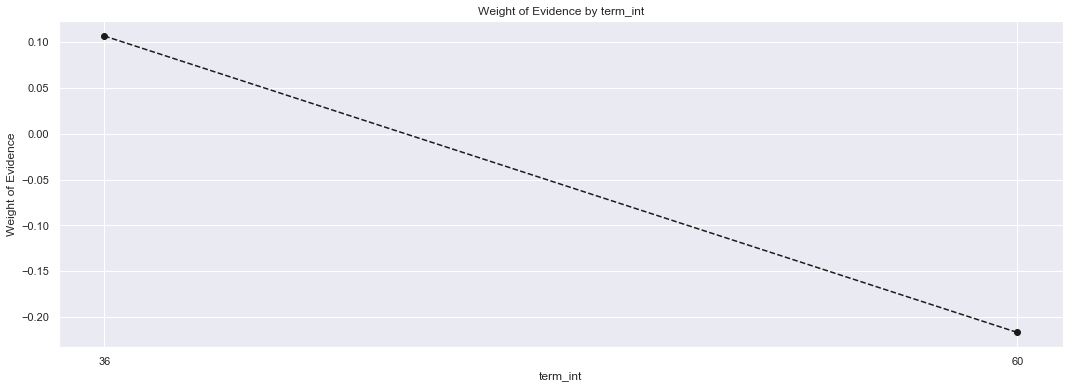

In [276]:
plot_by_woe(df_temp)

In [277]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

### <hr>Dummy Variables for int_rate

In [278]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [279]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

C:\Users\DiniDev\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning:

invalid value encountered in subtract



,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.296, 5.793]",2061,0.996604,0.012039,2054.0,7.0,0.012695,0.000744,2.836358,NaN,NaN,inf
1,"(5.793, 6.267]",4060,0.990394,0.023716,4021.0,39.0,0.024853,0.004148,1.790448,0.006210,1.045910,inf
2,"(6.267, 6.74]",3292,0.980559,0.019230,3228.0,64.0,0.019952,0.006806,1.075458,0.009835,0.714989,inf
3,"(6.74, 7.214]",3568,0.991031,0.020842,3536.0,32.0,0.021855,0.003403,1.859739,0.010472,0.784281,inf
4,"(7.214, 7.687]",4261,0.977705,0.024890,4166.0,95.0,0.025749,0.010103,0.935558,0.013327,0.924181,inf
5,"(7.687, 8.16]",7260,0.980303,0.042408,7117.0,143.0,0.043989,0.015208,1.062120,0.002598,0.126562,inf
6,"(8.16, 8.634]",6024,0.991700,0.035188,5974.0,50.0,0.036924,0.005317,1.937872,0.011397,0.875752,inf
7,"(8.634, 9.107]",3014,0.949569,0.017606,2862.0,152.0,0.017689,0.016165,0.090119,0.042131,1.847754,inf
8,"(9.107, 9.581]",5880,0.993537,0.034347,5842.0,38.0,0.036108,0.004041,2.189966,0.043969,2.099847,inf
9,"(9.581, 10.054]",6519,0.978985,0.038080,6382.0,137.0,0.039446,0.014570,0.995979,0.014553,1.193986,inf


In [280]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [281]:
df_inputs_prepr['int_rate'].describe()
# Average interest is 13.26% Anything above this will be considered of high risk let's see if this is true.
df_inputs_prepr['interest_payments'] = np.nan
lst = [df_inputs_prepr]

for col in lst:
    col.loc[col['int_rate'] <= 13.23, 'interest_payments'] = 'Low'
    col.loc[col['int_rate'] > 13.23, 'interest_payments'] = 'High'

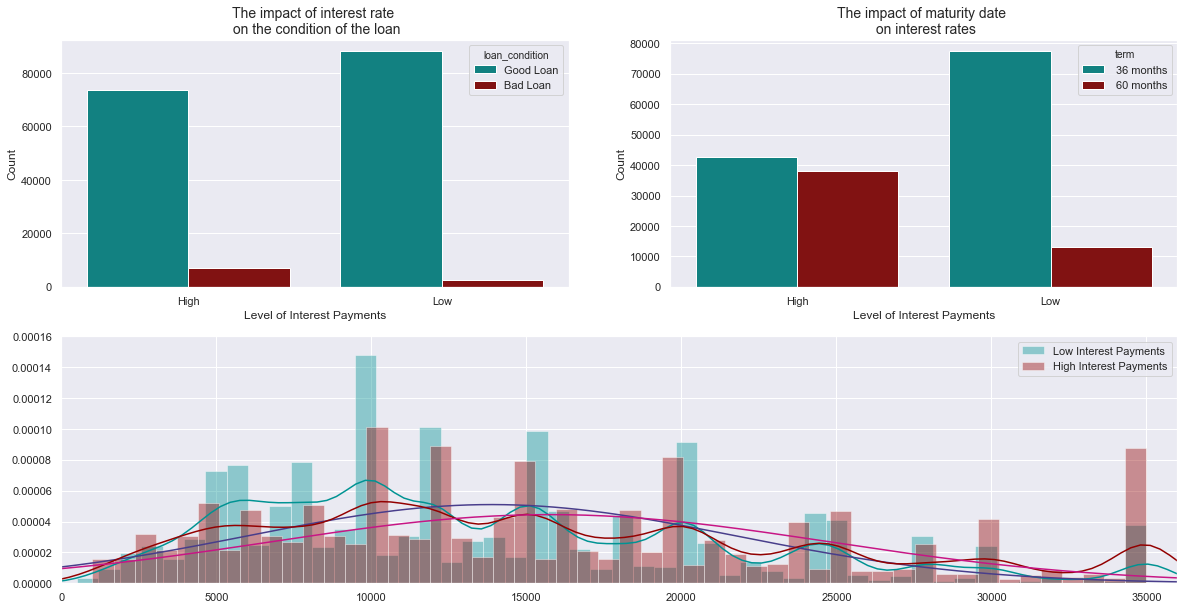

In [282]:
from scipy.stats import norm

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df_inputs_prepr, 
                  palette=palette, hue='loan_condition')

ax.set_title('The impact of interest rate \n on the condition of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax1 = sns.countplot(x='interest_payments', data=df_inputs_prepr, 
                   palette=palette, hue='term')

ax1.set_title('The impact of maturity date \n on interest rates', fontsize=14)
ax1.set_xlabel('Level of Interest Payments', fontsize=12)
ax1.set_ylabel('Count')


plt.subplot(212)
low = df_inputs_prepr['loan_amnt'].loc[df_inputs_prepr['interest_payments'] == 'Low'].values
high = df_inputs_prepr['loan_amnt'].loc[df_inputs_prepr['interest_payments'] == 'High'].values


ax2= sns.distplot(low, color='#009393', label='Low Interest Payments', fit=norm, fit_kws={"color":"#483d8b"}) # Dark Blue Norm Color
ax3 = sns.distplot(high, color='#930000', label='High Interest Payments', fit=norm, fit_kws={"color":"#c71585"}) #  Red Norm Color
plt.axis([0, 36000, 0, 0.00016])
plt.legend()


plt.show()

### <hr>Dummy Variables for emp_length_int

In [283]:
df_inputs_prepr['emp_length_int'].unique()

array([ 9.,  7.,  4., 10.,  2.,  3.,  5.,  0.,  8.,  6.,  1.])

In [284]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,21881,0.939582,0.127814,20559.0,1322.0,0.127071,0.140593,-0.101124,NaN,NaN,0.01252
1,1.0,10978,0.945072,0.064126,10375.0,603.0,0.064126,0.064128,-0.000039,0.005490,0.101084,0.01252
2,2.0,15175,0.946557,0.088642,14364.0,811.0,0.088781,0.086249,0.028936,0.001485,0.028975,0.01252
3,3.0,13417,0.944697,0.078373,12675.0,742.0,0.078342,0.078911,-0.007239,0.001860,0.036175,0.01252
4,4.0,10209,0.942894,0.059634,9626.0,583.0,0.059497,0.062001,-0.041241,0.001804,0.034002,0.01252
5,5.0,10784,0.936758,0.062993,10102.0,682.0,0.062439,0.072530,-0.149818,0.006135,0.108577,0.01252
6,6.0,8316,0.930736,0.048576,7740.0,576.0,0.047839,0.061257,-0.247227,0.006022,0.097410,0.01252
7,7.0,8687,0.940256,0.050744,8168.0,519.0,0.050485,0.055195,-0.089201,0.009520,0.158026,0.01252
8,8.0,8615,0.947882,0.050323,8166.0,449.0,0.050473,0.047751,0.055435,0.007626,0.144636,0.01252
9,9.0,6688,0.942733,0.039067,6305.0,383.0,0.038970,0.040732,-0.044213,0.005148,0.099648,0.01252


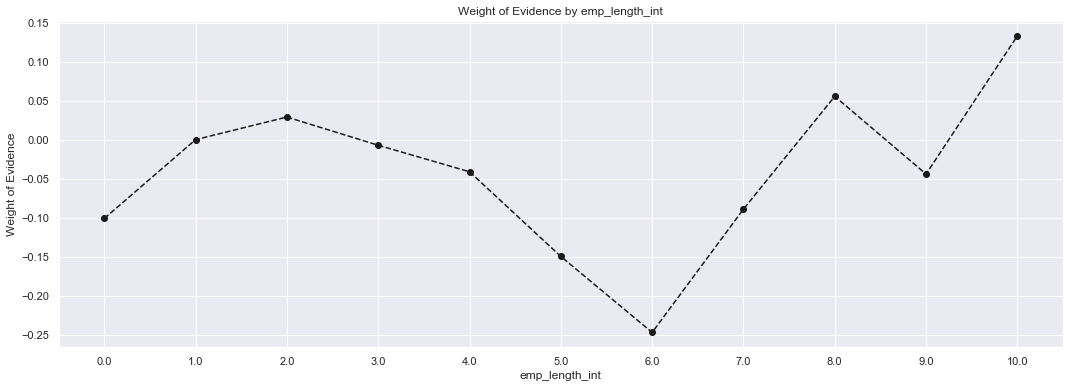

In [285]:
plot_by_woe(df_temp)

In [286]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### <hr>Dummy Variables for mths_issued_date

In [287]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 65.,  35.,  29.,  24.,  47.,  33.,  25.,  53.,  27.,  56.,  34.,
        36.,  26.,  50.,  41.,  42.,  64.,  52.,  84.,  79.,  59.,  30.,
        31.,  62.,  43.,  96.,  28.,  61.,  74.,  38.,  32.,  48.,  37.,
        39.,  40.,  60.,  46.,  44.,  57.,  51.,  63.,  55.,  68.,  58.,
        45.,  67.,  70.,  85.,  86., 119.,  71., 105.,  66.,  88.,  49.,
        76.,  93.,  91.,  69.,  82., 109.,  81.,  54.,  75., 118.,  94.,
        77., 104.,  80.,  73.,  83.,  72.,  78.,  89., 103.,  90.,  92.,
        87., 120.,  98., 114., 100.,  97.,  95.,  99., 124., 117., 113.,
       112., 125., 107., 108., 106., 115., 101., 102., 116., 121., 122.,
       110., 123., 111.])

In [288]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [289]:
df_inputs_prepr['mths_since_issue_d_factor']

204061      (64.4, 66.42]
831518      (34.1, 36.12]
649648     (28.04, 30.06]
654074     (28.04, 30.06]
463172    (23.899, 26.02]
               ...       
284953     (36.12, 38.14]
249719     (36.12, 38.14]
333886     (40.16, 42.18]
67419      (48.24, 50.26]
613396     (26.02, 28.04]
Name: mths_since_issue_d_factor, Length: 171194, dtype: category
Categories (50, interval[float64]): [(23.899, 26.02] < (26.02, 28.04] < (28.04, 30.06] < (30.06, 32.08] ... (116.92, 118.94] < (118.94, 120.96] < (120.96, 122.98] < (122.98, 125.0]]

In [290]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(23.899, 26.02]",24129,1.000000,0.140945,24129.0,0.0,0.149137,0.000000,inf,NaN,NaN,inf
1,"(26.02, 28.04]",12801,0.999531,0.074775,12795.0,6.0,0.079084,0.000638,4.819774,0.000469,inf,inf
2,"(28.04, 30.06]",14335,0.996652,0.083735,14287.0,48.0,0.088305,0.005105,2.850628,0.002880,1.969146,inf
3,"(30.06, 32.08]",13167,0.988988,0.076913,13022.0,145.0,0.080487,0.015421,1.652385,0.007664,1.198243,inf
4,"(32.08, 34.1]",9464,0.979079,0.055282,9266.0,198.0,0.057271,0.021057,1.000563,0.009909,0.651822,inf
5,"(34.1, 36.12]",8815,0.971980,0.051491,8568.0,247.0,0.052957,0.026268,0.701125,0.007099,0.299439,inf
6,"(36.12, 38.14]",12183,0.954281,0.071165,11626.0,557.0,0.071858,0.059236,0.193157,0.017699,0.507967,inf
7,"(38.14, 40.16]",5611,0.941009,0.032776,5280.0,331.0,0.032635,0.035202,-0.075714,0.013272,0.268871,inf
8,"(40.16, 42.18]",8938,0.931193,0.052210,8323.0,615.0,0.051443,0.065405,-0.240121,0.009816,0.164407,inf
9,"(42.18, 44.2]",7462,0.923077,0.043588,6888.0,574.0,0.042573,0.061044,-0.360370,0.008116,0.120249,inf


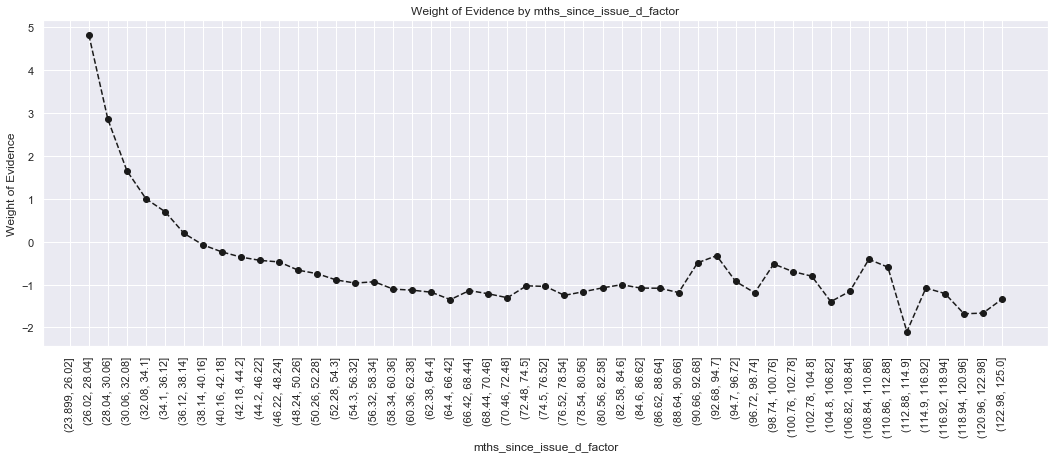

In [291]:
plot_by_woe(df_temp, 90)

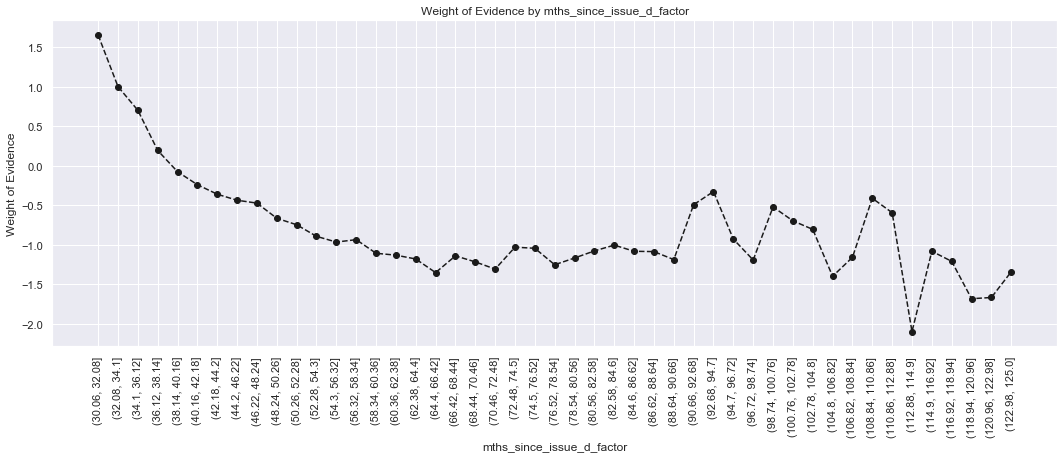

In [292]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [293]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

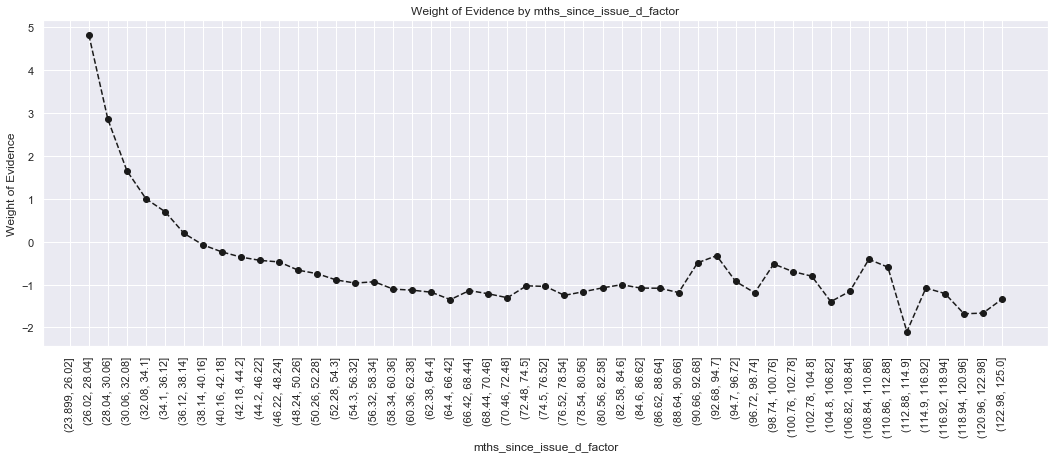

In [294]:
plot_by_woe(df_temp, 90)

### <hr>Dummy Variables for funded_amnt_factor

In [295]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",539,0.949907,0.003148,512.0,27.0,0.003165,0.002871,0.097211,NaN,NaN,0.026971
1,"(1190.0, 1880.0]",1263,0.945368,0.007378,1194.0,69.0,0.007380,0.007338,0.005681,0.004539,0.091530,0.026971
2,"(1880.0, 2570.0]",2551,0.936887,0.014901,2390.0,161.0,0.014772,0.017122,-0.147632,0.008481,0.153314,0.026971
3,"(2570.0, 3260.0]",2977,0.936177,0.017390,2787.0,190.0,0.017226,0.020206,-0.159580,0.000710,0.011947,0.026971
4,"(3260.0, 3950.0]",2084,0.933781,0.012173,1946.0,138.0,0.012028,0.014676,-0.198999,0.002396,0.039419,0.026971
5,"(3950.0, 4640.0]",3732,0.944802,0.021800,3526.0,206.0,0.021794,0.021908,-0.005233,0.011021,0.193766,0.026971
6,"(4640.0, 5330.0]",7238,0.948052,0.042280,6862.0,376.0,0.042413,0.039987,0.058888,0.003250,0.064122,0.026971
7,"(5330.0, 6020.0]",7549,0.950987,0.044096,7179.0,370.0,0.044372,0.039349,0.120136,0.002935,0.061247,0.026971
8,"(6020.0, 6710.0]",2828,0.930693,0.016519,2632.0,196.0,0.016268,0.020844,-0.247892,0.020294,0.368028,0.026971
9,"(6710.0, 7400.0]",5090,0.950098,0.029732,4836.0,254.0,0.029890,0.027013,0.101232,0.019405,0.349124,0.026971


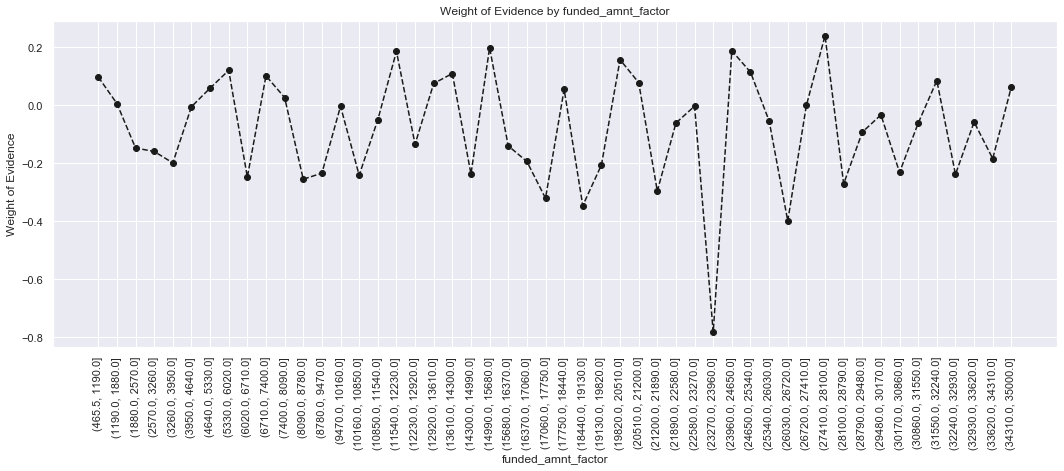

In [296]:
plot_by_woe(df_temp, 90)

### <hr>Dummy Variables for mths_since_earliest_cr_line

In [297]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(60.222, 76.56]",809,0.986403,0.004726,798.0,11.0,0.004932,0.001170,1.438937,NaN,NaN,inf
1,"(76.56, 92.12]",1888,0.971398,0.011028,1834.0,54.0,0.011336,0.005743,0.679994,0.015005,0.758943,inf
2,"(92.12, 107.68]",2167,0.941855,0.012658,2041.0,126.0,0.012615,0.013400,-0.060363,0.029543,0.740357,inf
3,"(107.68, 123.24]",4594,0.941445,0.026835,4325.0,269.0,0.026732,0.028608,-0.067821,0.000410,0.007457,inf
4,"(123.24, 138.8]",7237,0.931601,0.042274,6742.0,495.0,0.041671,0.052643,-0.233722,0.009844,0.165902,inf
5,"(138.8, 154.36]",9239,0.946964,0.053968,8749.0,490.0,0.054076,0.052111,0.037013,0.015362,0.270735,inf
6,"(154.36, 169.92]",11109,0.947340,0.064891,10524.0,585.0,0.065047,0.062214,0.044525,0.000376,0.007512,inf
7,"(169.92, 185.48]",14703,0.948854,0.085885,13951.0,752.0,0.086229,0.079974,0.075294,0.001514,0.030768,inf
8,"(185.48, 201.04]",15553,0.943869,0.090850,14680.0,873.0,0.090734,0.092843,-0.022971,0.004985,0.098264,inf
9,"(201.04, 216.6]",15100,0.934834,0.088204,14116.0,984.0,0.087248,0.104647,-0.181838,0.009035,0.158867,inf


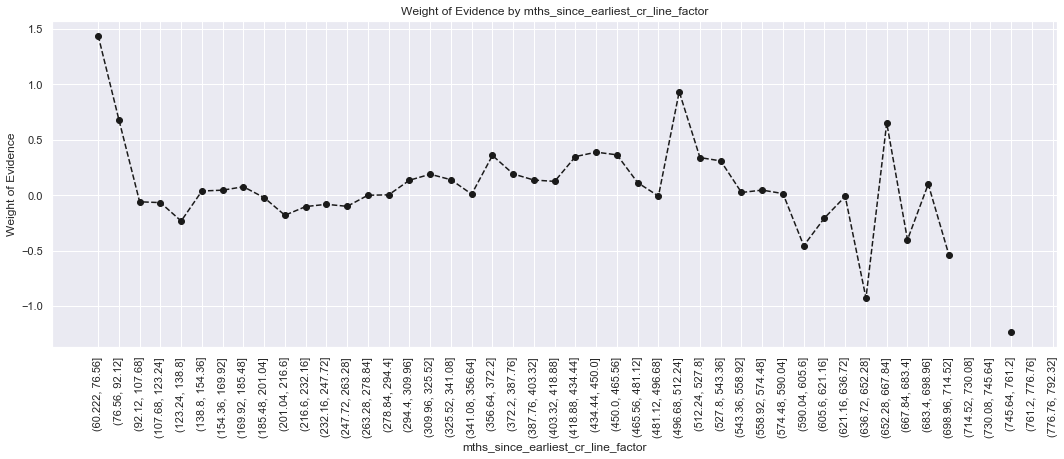

In [298]:
plot_by_woe(df_temp, 90)

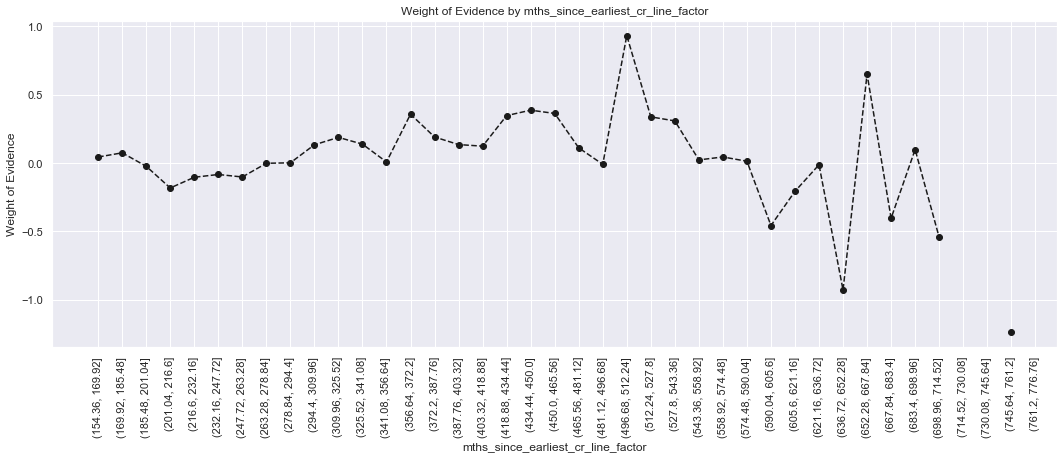

In [299]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [300]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

### <hr>Dummy Variables for delinq_2yrs

In [301]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,138869,0.943861,0.811179,131073.0,7796.0,0.810138,0.829097,-0.023133,NaN,NaN,inf
1,1.0,21486,0.949595,0.125507,20403.0,1083.0,0.126107,0.115176,0.090670,0.005734,0.113803,inf
2,2.0,6372,0.952134,0.037221,6067.0,305.0,0.037499,0.032436,0.145031,0.002539,0.054361,inf
3,3.0,2310,0.946320,0.013493,2186.0,124.0,0.013511,0.013187,0.024271,0.005814,0.120761,inf
4,4.0,994,0.953722,0.005806,948.0,46.0,0.005859,0.004892,0.180437,0.007402,0.156166,inf
5,5.0,494,0.947368,0.002886,468.0,26.0,0.002893,0.002765,0.045095,0.006354,0.135341,inf
6,6.0,246,0.963415,0.001437,237.0,9.0,0.001465,0.000957,0.425559,0.016046,0.380464,inf
7,7.0,152,0.947368,0.000888,144.0,8.0,0.000890,0.000851,0.045095,0.016046,0.380464,inf
8,8.0,87,0.988506,0.000508,86.0,1.0,0.000532,0.000106,1.609071,0.041137,1.563976,inf
9,9.0,64,0.968750,0.000374,62.0,2.0,0.000383,0.000213,0.588711,0.019756,1.020360,inf


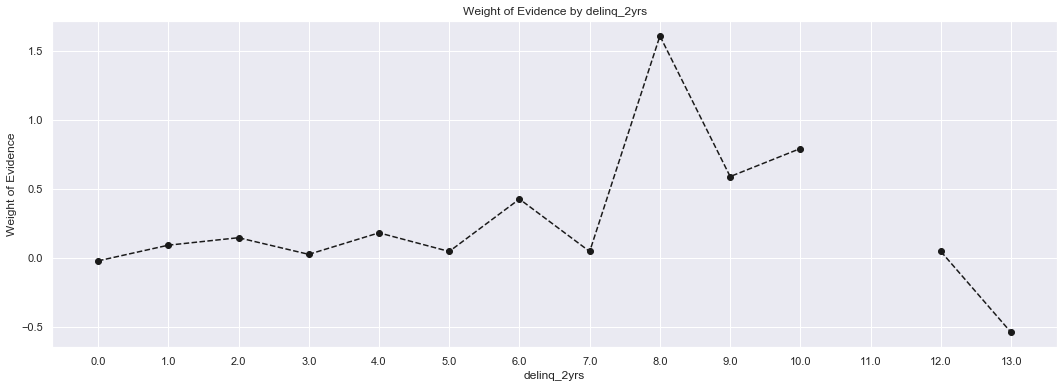

In [302]:
plot_by_woe(df_temp)

In [303]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

### <hr>Dummy Variables for inq_last_6mths

In [304]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,96493,0.958349,0.563647,92474.0,4019.0,0.571565,0.427417,0.290618,NaN,NaN,inf
1,1.0,46538,0.938867,0.271844,43693.0,2845.0,0.270058,0.302563,-0.113652,0.019482,0.404270,inf
2,2.0,18079,0.915925,0.105605,16559.0,1520.0,0.102348,0.161651,-0.457057,0.022943,0.343405,inf
3,3.0,7244,0.897570,0.042315,6502.0,742.0,0.040188,0.078911,-0.674761,0.018354,0.217704,inf
4,4.0,1972,0.909736,0.011519,1794.0,178.0,0.011088,0.018930,-0.534857,0.012166,0.139904,inf
5,5.0,665,0.897744,0.003884,597.0,68.0,0.003690,0.007232,-0.672867,0.011992,0.138010,inf
6,6.0,189,0.846561,0.001104,160.0,29.0,0.000989,0.003084,-1.137399,0.051184,0.464531,inf
7,7.0,9,0.777778,0.000053,7.0,2.0,0.000043,0.000213,-1.592514,0.068783,0.455115,inf
8,8.0,5,1.000000,0.000029,5.0,0.0,0.000031,0.000000,inf,0.222222,inf,inf


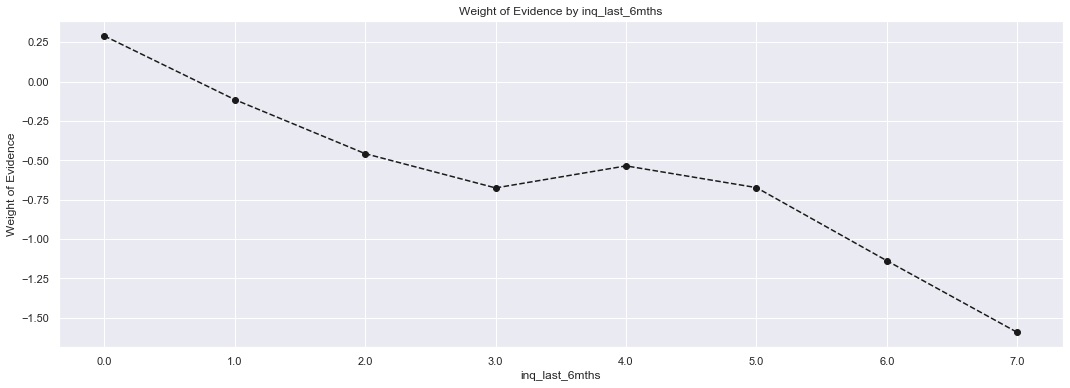

In [305]:
plot_by_woe(df_temp)

In [306]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

### <hr>Dummy Variables for open_acc

In [307]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\DiniDev\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning:

divide by zero encountered in log



,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1,0.000000,0.000006,0.0,1.0,0.000000,0.000106,-inf,NaN,NaN,inf
1,1.0,42,0.928571,0.000245,39.0,3.0,0.000241,0.000319,-0.280327,0.928571,inf,inf
2,2.0,511,0.921722,0.002985,471.0,40.0,0.002911,0.004254,-0.379298,0.006849,0.098971,inf
3,3.0,1783,0.927650,0.010415,1654.0,129.0,0.010223,0.013719,-0.294137,0.005928,0.085161,inf
4,4.0,4520,0.938274,0.026403,4241.0,279.0,0.026213,0.029671,-0.123934,0.010624,0.170203,inf
5,5.0,7577,0.941138,0.044260,7131.0,446.0,0.044075,0.047432,-0.073389,0.002863,0.050545,inf
6,6.0,10728,0.941182,0.062666,10097.0,631.0,0.062408,0.067106,-0.072589,0.000044,0.000800,inf
7,7.0,13189,0.942452,0.077041,12430.0,759.0,0.076828,0.080719,-0.049410,0.001270,0.023179,inf
8,8.0,14813,0.942145,0.086528,13956.0,857.0,0.086259,0.091141,-0.055050,0.000307,0.005640,inf
9,9.0,15459,0.943075,0.090301,14579.0,880.0,0.090110,0.093587,-0.037861,0.000930,0.017189,inf


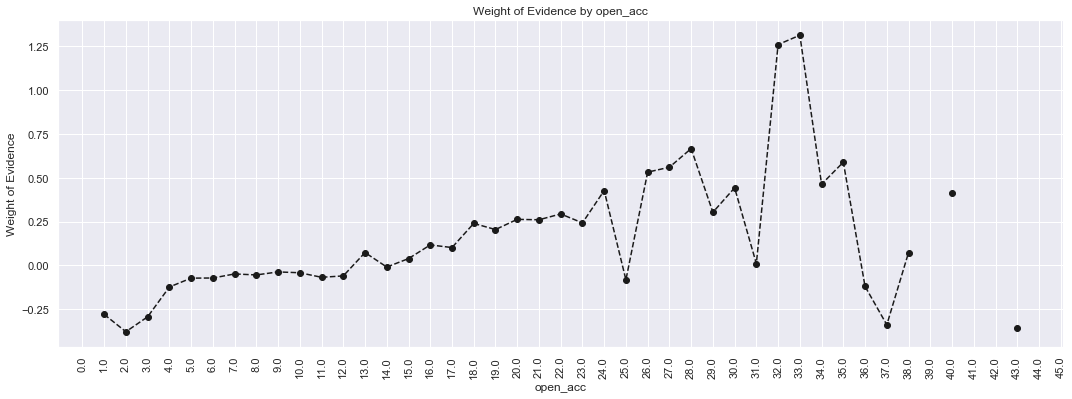

In [308]:
plot_by_woe(df_temp, 90)

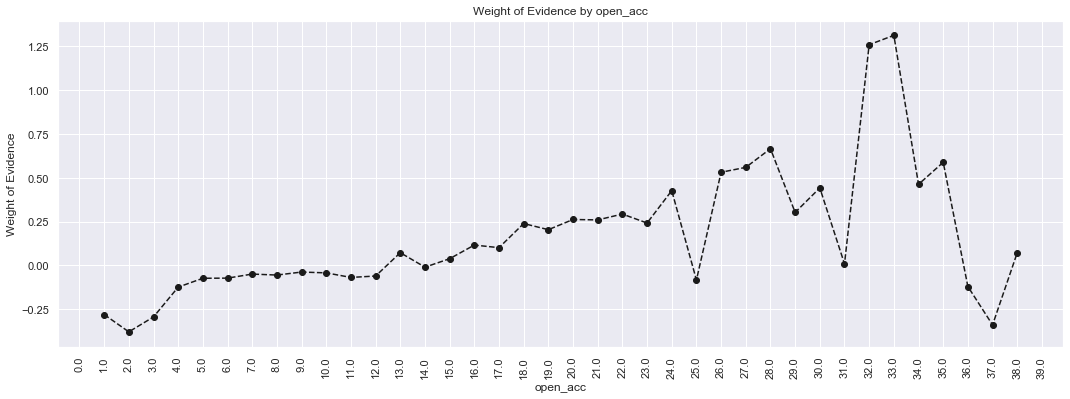

In [309]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [310]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

### <hr>Dummy Variables for pub_rec

In [311]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,145307,0.943086,0.848786,137037.0,8270.0,0.847000,0.879507,-0.037660,NaN,NaN,inf
1,1.0,21549,0.954290,0.125875,20564.0,985.0,0.127102,0.104754,0.193379,0.011204,0.231039,inf
2,2.0,2887,0.963284,0.016864,2781.0,106.0,0.017189,0.011273,0.421850,0.008993,0.228471,inf
3,3.0,860,0.969767,0.005024,834.0,26.0,0.005155,0.002765,0.622860,0.006484,0.201010,inf
4,4.0,291,0.965636,0.001700,281.0,10.0,0.001737,0.001063,0.490493,0.004132,0.132367,inf
5,5.0,145,0.979310,0.000847,142.0,3.0,0.000878,0.000319,1.011938,0.013675,0.521445,inf
6,6.0,67,0.985075,0.000391,66.0,1.0,0.000408,0.000106,1.344378,0.005764,0.332440,inf
7,7.0,39,0.948718,0.000228,37.0,2.0,0.000229,0.000213,0.072494,0.036357,1.271884,inf
8,8.0,14,1.000000,0.000082,14.0,0.0,0.000087,0.000000,inf,0.051282,inf,inf
9,9.0,7,1.000000,0.000041,7.0,0.0,0.000043,0.000000,inf,0.000000,NaN,inf


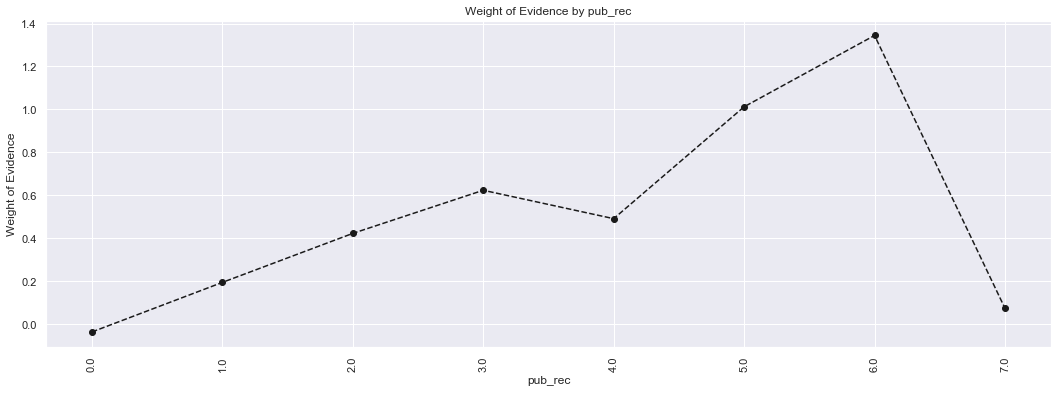

In [312]:
plot_by_woe(df_temp, 90)

In [313]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

### <hr>Dummy Variables for total_acc

In [314]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1.833, 5.34]",1444,0.924515,0.008435,1335.0,109.0,0.008251,0.011592,-0.339938,NaN,NaN,inf
1,"(5.34, 8.68]",5416,0.931684,0.031637,5046.0,370.0,0.031188,0.039349,-0.232428,0.007169,0.107509,inf
2,"(8.68, 12.02]",14184,0.939016,0.082853,13319.0,865.0,0.082322,0.091992,-0.111059,0.007332,0.121369,inf
3,"(12.02, 15.36]",15180,0.938274,0.088671,14243.0,937.0,0.088033,0.099649,-0.123939,0.000742,0.012880,inf
4,"(15.36, 18.7]",17546,0.942950,0.102492,16545.0,1001.0,0.102262,0.106455,-0.040192,0.004676,0.083747,inf
5,"(18.7, 22.04]",24955,0.944099,0.145770,23560.0,1395.0,0.145620,0.148357,-0.018621,0.001149,0.021572,inf
6,"(22.04, 25.38]",17880,0.945302,0.104443,16902.0,978.0,0.104468,0.104009,0.004401,0.001203,0.023022,inf
7,"(25.38, 28.72]",15824,0.948812,0.092433,15014.0,810.0,0.092799,0.086143,0.074428,0.003510,0.070027,inf
8,"(28.72, 32.06]",17739,0.946502,0.103619,16790.0,949.0,0.103776,0.100925,0.027853,0.002310,0.046574,inf
9,"(32.06, 35.4]",10393,0.949389,0.060709,9867.0,526.0,0.060986,0.055940,0.086373,0.002887,0.058520,inf


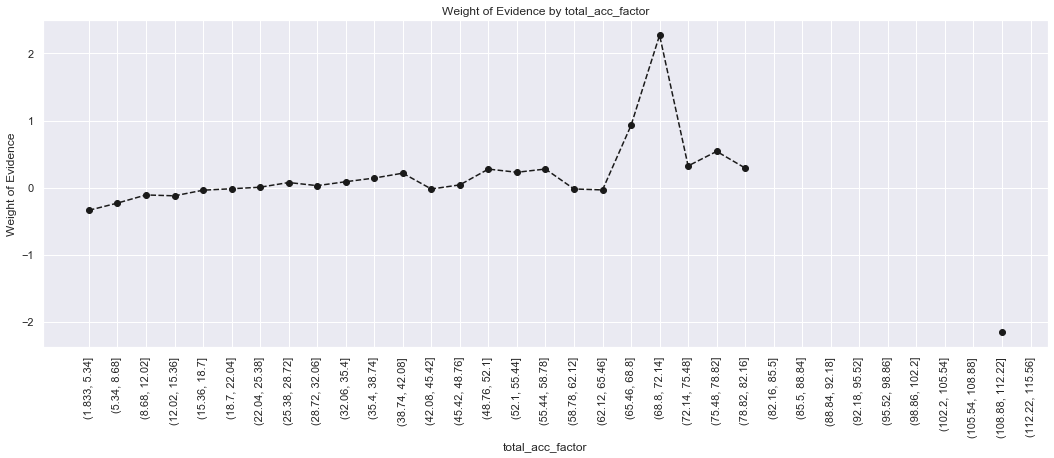

In [315]:
plot_by_woe(df_temp, 90)

In [316]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

### <hr>Dummy Variables for acc_now_delinq

In [317]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,170400,0.944977,0.995362,161024.0,9376.0,0.995259,0.997129,-0.001876,NaN,NaN,inf
1,1.0,740,0.964865,0.004323,714.0,26.0,0.004413,0.002765,0.467510,0.019888,0.469386,inf
2,2.0,46,0.978261,0.000269,45.0,1.0,0.000278,0.000106,0.961386,0.013396,0.493876,inf
3,3.0,5,1.000000,0.000029,5.0,0.0,0.000031,0.000000,inf,0.021739,inf,inf
4,4.0,2,1.000000,0.000012,2.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf
5,6.0,1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf


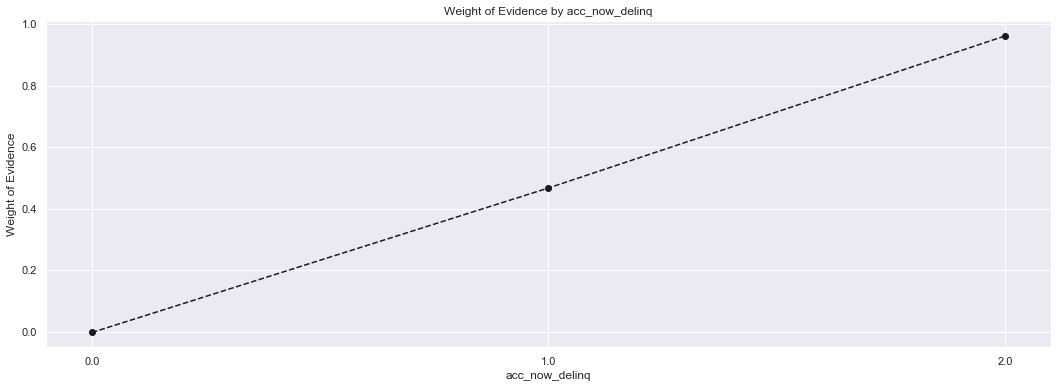

In [318]:
plot_by_woe(df_temp)

In [319]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

### <hr>Dummy Variables for total_rev_hi_lim_factor

In [320]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",7134,0.914073,0.041672,6521.0,613.0,0.040305,0.065192,-0.480859,NaN,NaN,inf
1,"(5000.0, 9999.999]",20910,0.929173,0.122142,19429.0,1481.0,0.120087,0.157503,-0.271227,0.015099,0.209631,inf
2,"(9999.999, 14999.998]",25119,0.933596,0.146728,23451.0,1668.0,0.144946,0.177390,-0.201989,0.004423,0.069239,inf
3,"(14999.998, 19999.998]",22956,0.937402,0.134093,21519.0,1437.0,0.133005,0.152824,-0.138898,0.003806,0.063091,inf
4,"(19999.998, 24999.997]",19114,0.942974,0.111651,18024.0,1090.0,0.111403,0.115920,-0.039750,0.005572,0.099148,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


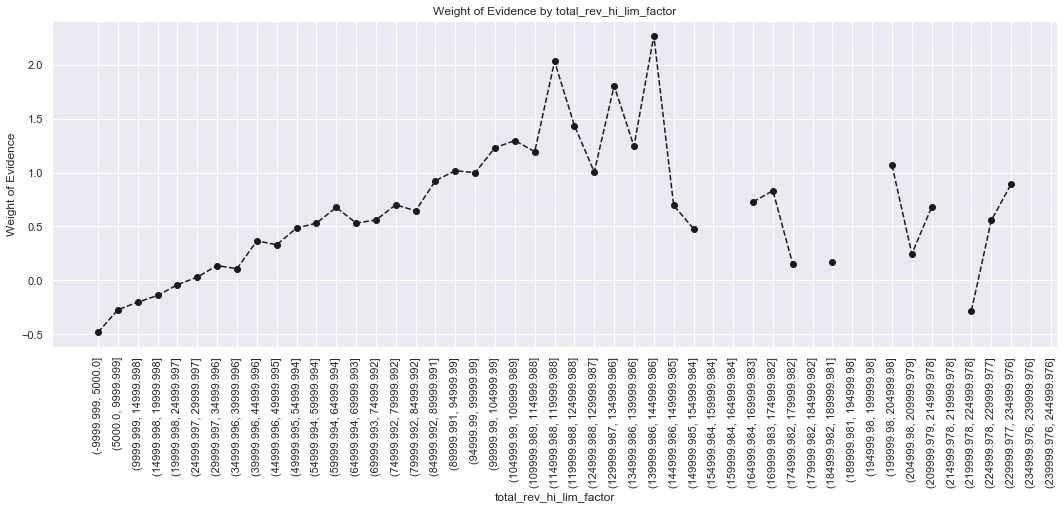

In [321]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [322]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

### <hr>Dummy Variables for installment

In [323]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.26, 44.285]",830,0.945783,0.004848,785.0,45.0,0.004852,0.004786,0.013745,NaN,NaN,inf
1,"(44.285, 72.881]",2143,0.944004,0.012518,2023.0,120.0,0.012504,0.012762,-0.020431,0.001779,0.034176,inf
2,"(72.881, 101.476]",3147,0.938672,0.018383,2954.0,193.0,0.018258,0.020525,-0.117051,0.005332,0.096620,inf
3,"(101.476, 130.072]",3719,0.934660,0.021724,3476.0,243.0,0.021485,0.025843,-0.184701,0.004012,0.067649,inf
4,"(130.072, 158.667]",5028,0.943914,0.029370,4746.0,282.0,0.029334,0.029990,-0.022126,0.009254,0.162574,inf
5,"(158.667, 187.262]",7687,0.949005,0.044902,7295.0,392.0,0.045089,0.041689,0.078406,0.005091,0.100532,inf
6,"(187.262, 215.858]",7424,0.950162,0.043366,7054.0,370.0,0.043599,0.039349,0.102571,0.001157,0.024164,inf
7,"(215.858, 244.453]",7419,0.951746,0.043337,7061.0,358.0,0.043643,0.038073,0.136532,0.001584,0.033962,inf
8,"(244.453, 273.049]",9737,0.955120,0.056877,9300.0,437.0,0.057482,0.046475,0.212560,0.003374,0.076028,inf
9,"(273.049, 301.644]",8985,0.939677,0.052484,8443.0,542.0,0.052185,0.057641,-0.099450,0.015442,0.312010,inf


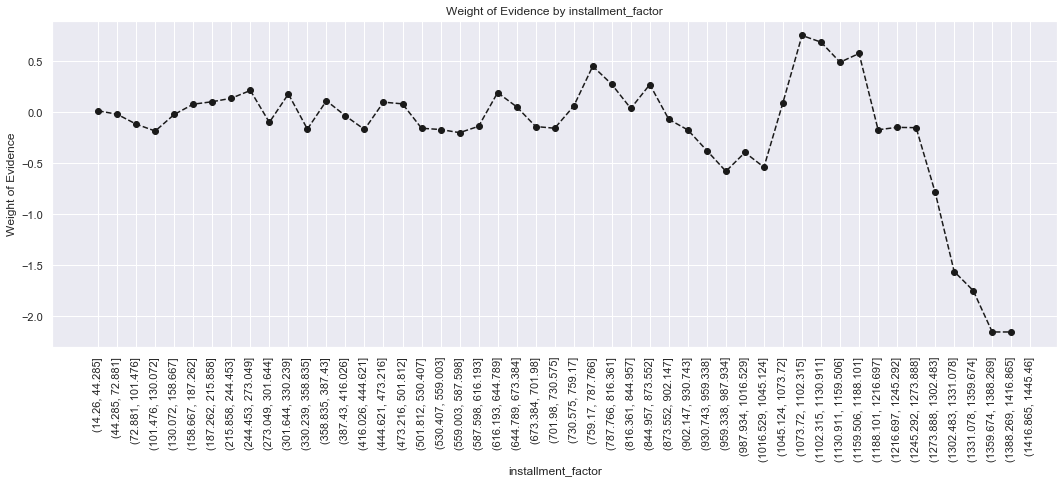

In [324]:
plot_by_woe(df_temp, 90)

### <hr>Dummy Variables for annual_inc

In [325]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-6497.0, 192940.0]",167179,0.944485,0.976547,157898.0,9281.0,0.975938,0.987025,-0.011297,NaN,NaN,inf
1,"(192940.0, 382880.0]",3505,0.969187,0.020474,3397.0,108.0,0.020996,0.011486,0.603240,0.024702,0.614537,inf
2,"(382880.0, 572820.0]",341,0.970674,0.001992,331.0,10.0,0.002046,0.001063,0.654257,0.001488,0.051017,inf
3,"(572820.0, 762760.0]",94,0.968085,0.000549,91.0,3.0,0.000562,0.000319,0.566971,0.002589,0.087286,inf
4,"(762760.0, 952700.0]",32,0.968750,0.000187,31.0,1.0,0.000192,0.000106,0.588711,0.000665,0.021740,inf
5,"(952700.0, 1142640.0]",19,1.000000,0.000111,19.0,0.0,0.000117,0.000000,inf,0.031250,inf,inf
6,"(1142640.0, 1332580.0]",9,1.000000,0.000053,9.0,0.0,0.000056,0.000000,inf,0.000000,NaN,inf
7,"(1332580.0, 1522520.0]",6,1.000000,0.000035,6.0,0.0,0.000037,0.000000,inf,0.000000,NaN,inf
8,"(1522520.0, 1712460.0]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
9,"(1712460.0, 1902400.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [326]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-6497.0, 97970.0]",135985,0.940449,0.794333,127887.0,8098.0,0.790446,0.861215,-0.085747,NaN,NaN,inf
1,"(97970.0, 192940.0]",31194,0.962076,0.182214,30011.0,1183.0,0.185492,0.125811,0.388234,0.021627,0.473980,inf
2,"(192940.0, 287910.0]",2872,0.967967,0.016776,2780.0,92.0,0.017183,0.009784,0.563141,0.005891,0.174907,inf
3,"(287910.0, 382880.0]",633,0.974724,0.003698,617.0,16.0,0.003814,0.001702,0.807004,0.006757,0.243863,inf
4,"(382880.0, 477850.0]",242,0.975207,0.001414,236.0,6.0,0.001459,0.000638,0.826796,0.000483,0.019792,inf
5,"(477850.0, 572820.0]",99,0.959596,0.000578,95.0,4.0,0.000587,0.000425,0.322306,0.015611,0.504490,inf
6,"(572820.0, 667790.0]",58,0.948276,0.000339,55.0,3.0,0.000340,0.000319,0.063444,0.011320,0.258862,inf
7,"(667790.0, 762760.0]",36,1.000000,0.000210,36.0,0.0,0.000223,0.000000,inf,0.051724,inf,inf
8,"(762760.0, 857730.0]",16,1.000000,0.000093,16.0,0.0,0.000099,0.000000,inf,0.000000,NaN,inf
9,"(857730.0, 952700.0]",16,0.937500,0.000093,15.0,1.0,0.000093,0.000106,-0.137226,0.062500,inf,inf


In [327]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [328]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\DiniDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(2863.0, 5740.0]",6,1.000000,0.000037,6.0,0.0,0.000040,0.000000,inf,NaN,NaN,inf
1,"(5740.0, 8480.0]",25,0.880000,0.000156,22.0,3.0,0.000146,0.000332,-0.825517,0.120000,inf,inf
2,"(8480.0, 11220.0]",172,0.901163,0.001074,155.0,17.0,0.001026,0.001883,-0.607735,0.021163,0.217782,inf
3,"(11220.0, 13960.0]",271,0.889299,0.001692,241.0,30.0,0.001595,0.003323,-0.734347,0.011864,0.126612,inf
4,"(13960.0, 16700.0]",596,0.936242,0.003721,558.0,38.0,0.003692,0.004210,-0.131174,0.046943,0.603173,inf
5,"(16700.0, 19440.0]",748,0.922460,0.004670,690.0,58.0,0.004565,0.006425,-0.341698,0.013782,0.210524,inf
6,"(19440.0, 22180.0]",1572,0.912214,0.009815,1434.0,138.0,0.009488,0.015287,-0.476977,0.010246,0.135279,inf
7,"(22180.0, 24920.0]",1476,0.926829,0.009216,1368.0,108.0,0.009052,0.011964,-0.278973,0.014616,0.198005,inf
8,"(24920.0, 27660.0]",2971,0.917873,0.018550,2727.0,244.0,0.018044,0.027030,-0.404158,0.008956,0.125185,inf
9,"(27660.0, 30400.0]",4537,0.925281,0.028328,4198.0,339.0,0.027777,0.037554,-0.301583,0.007408,0.102574,inf


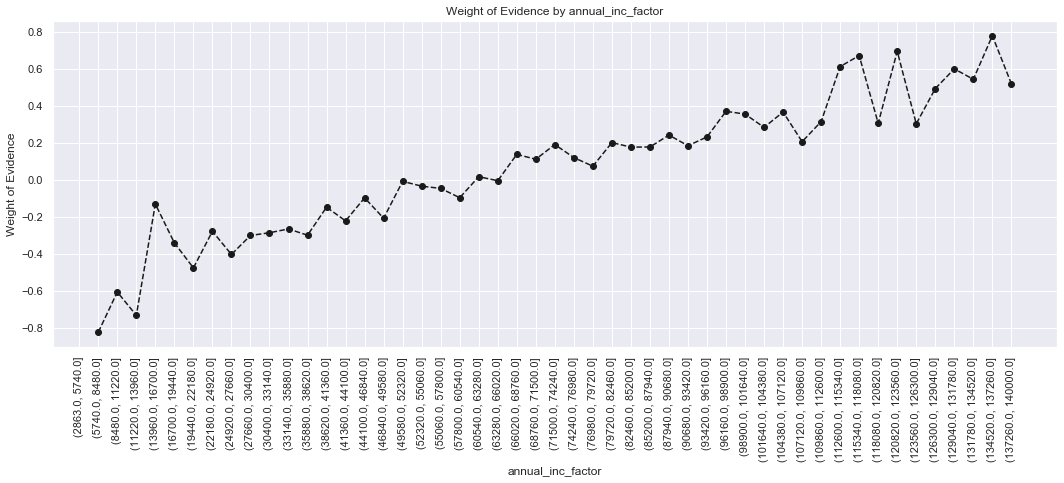

In [329]:
plot_by_woe(df_temp, 90)

In [330]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

### <hr>Dummy Variables for mths_since_last_delinq

In [331]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\DiniDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.17, 3.4]",2487,0.946120,0.029966,2353.0,134.0,0.029869,0.031769,-0.061653,NaN,NaN,inf
1,"(3.4, 6.8]",4040,0.953465,0.048678,3852.0,188.0,0.048898,0.044571,0.092646,0.007346,0.154299,inf
2,"(6.8, 10.2]",6364,0.951760,0.076679,6057.0,307.0,0.076888,0.072783,0.054862,0.001705,0.037784,inf
3,"(10.2, 13.6]",4695,0.947604,0.056570,4449.0,246.0,0.056476,0.058321,-0.032157,0.004156,0.087019,inf
4,"(13.6, 17.0]",5879,0.946590,0.070836,5565.0,314.0,0.070642,0.074443,-0.052401,0.001014,0.020244,inf
5,"(17.0, 20.4]",4214,0.949217,0.050774,4000.0,214.0,0.050776,0.050735,0.000814,0.002627,0.053214,inf
6,"(20.4, 23.8]",4023,0.948049,0.048473,3814.0,209.0,0.048415,0.049550,-0.023160,0.001168,0.023974,inf
7,"(23.8, 27.2]",5259,0.945997,0.063365,4975.0,284.0,0.063153,0.067330,-0.064054,0.002051,0.040893,inf
8,"(27.2, 30.6]",3820,0.952356,0.046027,3638.0,182.0,0.046181,0.043148,0.067923,0.006359,0.131976,inf
9,"(30.6, 34.0]",4834,0.951179,0.058244,4598.0,236.0,0.058367,0.055951,0.042285,0.001177,0.025638,inf


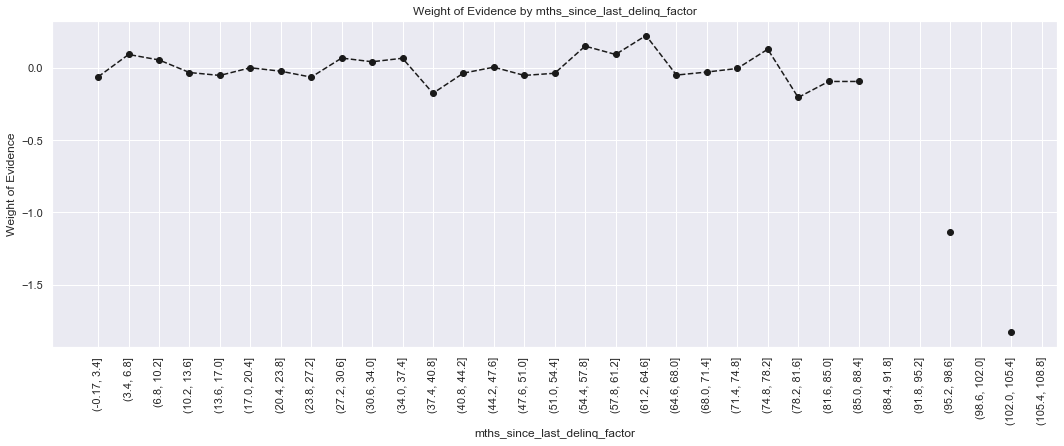

In [332]:
plot_by_woe(df_temp, 90)

In [333]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### <hr>Dummy Variables for dti

In [334]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.381, 3.805]",4826,0.947990,0.028190,4575.0,251.0,0.028277,0.026694,0.057632,NaN,NaN,inf
1,"(3.805, 7.611]",12829,0.952140,0.074938,12215.0,614.0,0.075499,0.065298,0.145148,0.004150,0.087516,inf
2,"(7.611, 11.416]",21809,0.951259,0.127393,20746.0,1063.0,0.128227,0.113049,0.125982,0.000881,0.019167,inf
3,"(11.416, 15.221]",27927,0.946969,0.163131,26446.0,1481.0,0.163458,0.157503,0.037111,0.004290,0.088871,inf
4,"(15.221, 19.026]",28576,0.943694,0.166922,26967.0,1609.0,0.166678,0.171116,-0.026276,0.003275,0.063386,inf
5,"(19.026, 22.832]",25906,0.940361,0.151325,24361.0,1545.0,0.150571,0.164309,-0.087317,0.003333,0.061041,inf
6,"(22.832, 26.637]",20397,0.936657,0.119146,19105.0,1292.0,0.118084,0.137403,-0.151518,0.003704,0.064201,inf
7,"(26.637, 30.442]",14589,0.940229,0.085219,13717.0,872.0,0.084782,0.092736,-0.089675,0.003572,0.061843,inf
8,"(30.442, 34.248]",8987,0.941694,0.052496,8463.0,524.0,0.052308,0.055727,-0.063309,0.001465,0.026366,inf
9,"(34.248, 38.053]",4071,0.971751,0.023780,3956.0,115.0,0.024451,0.012230,0.692780,0.030058,0.756089,inf


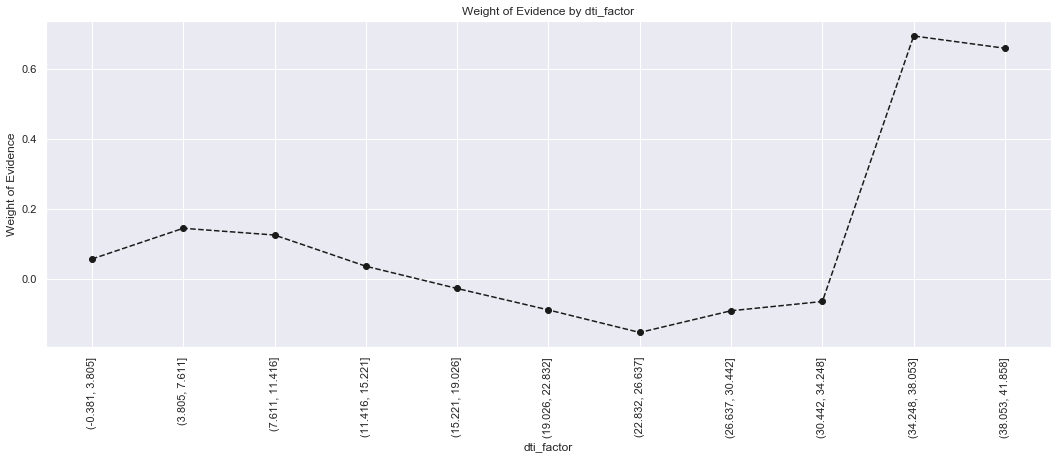

In [335]:
plot_by_woe(df_temp, 90)

In [336]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [337]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\DiniDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",454,0.933921,0.002715,424.0,30.0,0.002685,0.003221,-0.181787,NaN,NaN,0.01441
1,"(0.7, 1.4]",594,0.937710,0.003552,557.0,37.0,0.003528,0.003972,-0.118676,0.003790,0.063111,0.01441
2,"(1.4, 2.1]",797,0.942284,0.004766,751.0,46.0,0.004756,0.004938,-0.037559,0.004573,0.081117,0.01441
3,"(2.1, 2.8]",987,0.951368,0.005903,939.0,48.0,0.005947,0.005153,0.143291,0.009084,0.180850,0.01441
4,"(2.8, 3.5]",1346,0.956909,0.008050,1288.0,58.0,0.008157,0.006227,0.270080,0.005542,0.126788,0.01441
5,"(3.5, 4.2]",1545,0.954045,0.009240,1474.0,71.0,0.009335,0.007622,0.202732,0.002864,0.067348,0.01441
6,"(4.2, 4.9]",1857,0.949919,0.011106,1764.0,93.0,0.011172,0.009984,0.112416,0.004126,0.090315,0.01441
7,"(4.9, 5.6]",2170,0.948848,0.012977,2059.0,111.0,0.013040,0.011916,0.090122,0.001071,0.022294,0.01441
8,"(5.6, 6.3]",2469,0.951397,0.014766,2349.0,120.0,0.014877,0.012882,0.143930,0.002549,0.053808,0.01441
9,"(6.3, 7.0]",2803,0.954691,0.016763,2676.0,127.0,0.016948,0.013634,0.217568,0.003294,0.073638,0.01441


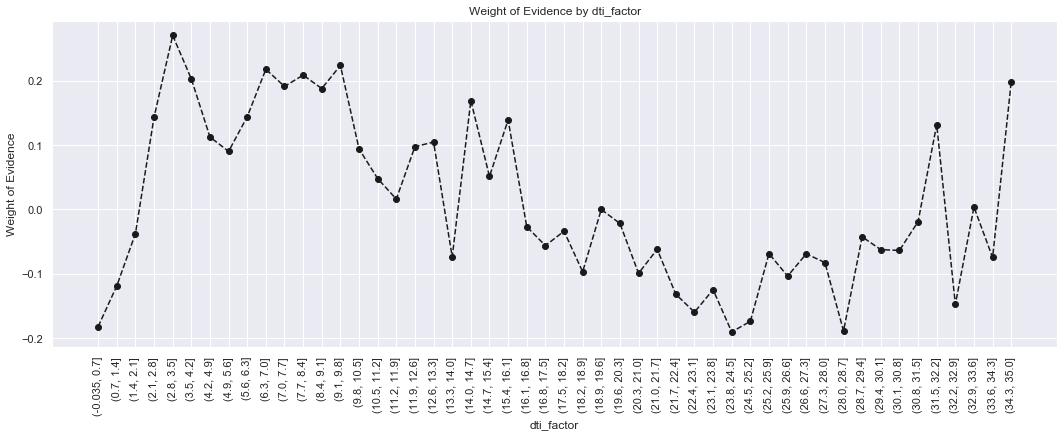

In [338]:
plot_by_woe(df_temp, 90)

In [339]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

### <hr>Dummy Variables for mths_since_last_record

In [340]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\DiniDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.12, 2.4]",160,0.837500,0.006150,134.0,26.0,0.005390,0.022453,-1.426782,NaN,NaN,inf
1,"(2.4, 4.8]",46,0.956522,0.001768,44.0,2.0,0.001770,0.001727,0.024517,0.119022,1.451299,inf
2,"(4.8, 7.2]",130,0.976923,0.004997,127.0,3.0,0.005109,0.002591,0.679049,0.020401,0.654532,inf
3,"(7.2, 9.6]",102,1.000000,0.003921,102.0,0.0,0.004103,0.000000,inf,0.023077,inf,inf
4,"(9.6, 12.0]",163,0.969325,0.006265,158.0,5.0,0.006356,0.004318,0.386632,0.030675,inf,inf
5,"(12.0, 14.4]",109,0.972477,0.004190,106.0,3.0,0.004264,0.002591,0.498301,0.003152,0.111670,inf
6,"(14.4, 16.8]",124,0.967742,0.004766,120.0,4.0,0.004827,0.003454,0.334672,0.004735,0.163629,inf
7,"(16.8, 19.2]",221,0.972851,0.008494,215.0,6.0,0.008649,0.005181,0.512353,0.005109,0.177681,inf
8,"(19.2, 21.6]",163,0.981595,0.006265,160.0,3.0,0.006436,0.002591,0.910036,0.008744,0.397683,inf
9,"(21.6, 24.0]",227,0.964758,0.008725,219.0,8.0,0.008810,0.006908,0.243105,0.016837,0.666931,inf


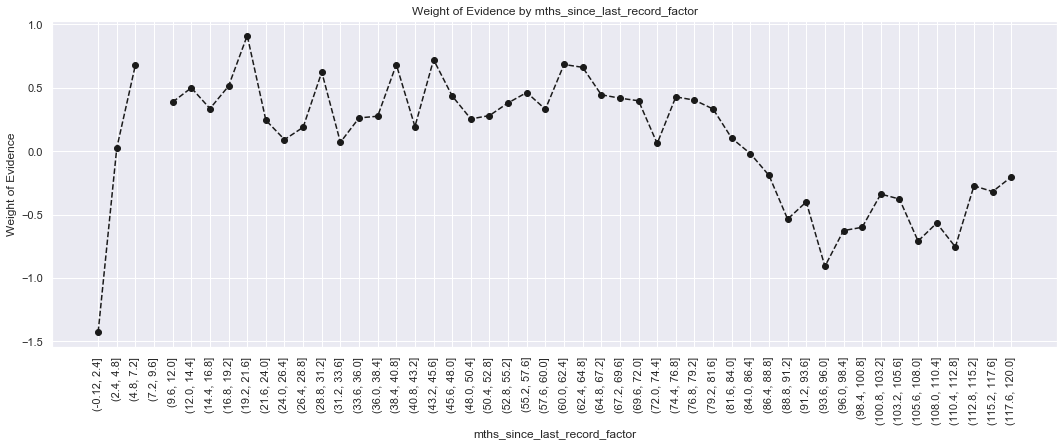

In [341]:
plot_by_woe(df_temp, 90)

In [342]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the Test Dataset

In [343]:
#####
#loan_data_inputs_train = df_inputs_prepr
#####
loan_data_inputs_test = df_inputs_prepr

In [269]:
loan_data_inputs_train.to_csv('inputs_train.csv')
loan_data_targets_train.to_csv('targets_train.csv')
loan_data_inputs_test.to_csv('inputs_test.csv')
loan_data_targets_test.to_csv('targets_test.csv')

C:\Users\DiniDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\DiniDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
